# **Project Title: Fuel Efficiency Analysis Using Machine Learning**

# Description:

This project aims to analyze the fuel efficiency of different cars using a dataset containing various car attributes. We will perform linear regression and other machine learning models to predict and understand factors influencing fuel consumption. Additionally, we will build and deploy a Streamlit web application to allow users to interact with the best-performing model.

# Dataset:
 The dataset used in this project contains information about different cars, including attributes such as:


YEAR: The year of the car model.

MAKE: The manufacturer of the car.

MODEL: The model name of the car.

VEHICLE CLASS: The class of the vehicle (e.g., compact, mid-size, subcompact).

ENGINE SIZE: The size of the engine in liters.

CYLINDERS: The number of cylinders in the engine.

TRANSMISSION: The type of transmission (e.g., A4 for automatic with 4 gears, M5 for manual with 5 gears).

FUEL: The type of fuel used (e.g., X for regular gasoline, Z for premium gasoline).

FUEL CONSUMPTION: The fuel consumption in the city in liters per 100 km.

HWY (L/100 km): The fuel consumption on the highway in liters per 100 km.

COMB (L/100 km): The combined fuel consumption in liters per 100 km.

COMB (mpg): The combined fuel consumption in miles per gallon.

EMISSIONS: The CO2 emissions in grams per km.

In [58]:
# Notes
# remember to extract no of gears(done)
#activate the correct method to extract the no of gears
#make company names properly capitalized(done)
#make vehicle class names properly capitalized and combine the same categories such as suv-small and suv:small(done)
#get eda graph inspiration from emissions notebook on kaggle opened tab
#see what companies have highest no. of cars in dataset using:
## products with highest sales
# highest_sales_products = total.groupby(['product'])['line_item_amount'].median().sort_values(ascending=False)
# highest_sales_products[:10]
# remove year and no. of gears column after eda(done)
#see model evaluation from co2 emissions kaggle
#learn about mean, median, mode, iqr and all the evaluation metrics sand what they mean
#learn about scaling,normalization and standardization
# remove other irrelevant columns while model building
# show fuel type graph and talk about how it cant be normalised or standardized
# square root rule from number of histogram bins, also add inline histograms from kaggle notebook in eda

# Step 1: Importing Libraries

In [160]:
import numpy as np #Linear Algebra
import pandas as pd #Data Processing
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
from sklearn.model_selection import train_test_split #Data Splitting
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.preprocessing import PolynomialFeatures #Polynomial Regression
from sklearn.svm import SVR #SVM/SVR
from sklearn.tree import DecisionTreeRegressor #Decision Trees
from sklearn.ensemble import RandomForestRegressor #Random Forest
from xgboost import XGBRegressor #XGBoost
from sklearn.preprocessing import OneHotEncoder #One Hot Encoding
from sklearn.metrics import mean_absolute_error #Model Evaluation
from sklearn.metrics import mean_squared_error #Model Evaluation
from sklearn.metrics import r2_score #Model Evaluation
from sklearn.metrics import mean_absolute_percentage_error #Model Evaluation
from sklearn.metrics import explained_variance_score #Model Evaluation
from sklearn.preprocessing import StandardScaler #Standardization
from sklearn.preprocessing import MinMaxScaler #Normalization


# Step 2: Loading Dataset

In [2]:
fuel_con = pd.read_csv('/content/Fuel_Consumption_2000-2022.csv') #loading the dataset
fuel_con.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


# Step 3: Data Preprocessing/Cleaning


In [3]:
fuel_con.shape #checking the shape of the dataset

(22556, 13)

In [4]:
fuel_con.info() #checking the datatypes and null values
# fuel_con.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [5]:
fuel_con.isnull().sum() #checking for null values

,0
YEAR,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
HWY (L/100 km),0


In [6]:
fuel_con.describe().transpose() #checking for statistical summary

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


In [7]:
fuel_con.duplicated().sum() #checking for duplicate values

1

In [8]:
fuel_con.drop_duplicates(inplace=True) #dropping duplicate values

In [9]:
fuel_con.duplicated().sum() #checking for duplicate values

0

In [10]:
# Initialize an empty list to store the number of gears
gears = []

# Iterate over the TRANSMISSION column
for transmission in fuel_con['TRANSMISSION']:
    # Initialize an empty string to store the number
    number_str = ''
    # Iterate over each character in the transmission string
    for char in transmission:
        if char.isdigit():  # Check if the character is a digit
            number_str += char
    # Append the number to the list if number_str is not empty
    if number_str:
        gears.append(int(number_str))
    else:
        gears.append(None)  # or insert null values

# Assign the list to a new column named 'No. of Gears'
fuel_con['No. of Gears'] = gears

# Display the first few rows to verify the new column
print(fuel_con[['TRANSMISSION', 'No. of Gears']].head())



  TRANSMISSION  No. of Gears
0           A4           4.0
1           M5           5.0
2          AS5           5.0
3           A4           4.0
4           A4           4.0


In [11]:
fuel_con.iloc[22524] #checking a two-digit transmission to verify results of loop



,22525
YEAR,2022
MAKE,Toyota
MODEL,Tundra Hybrid 4WD TRD PRO
VEHICLE CLASS,Pickup truck: Standard
ENGINE SIZE,3.4
CYLINDERS,6
TRANSMISSION,AS10
FUEL,X
FUEL CONSUMPTION,12.9
HWY (L/100 km),11.6


In [12]:
fuel_con.iloc[22516] #checking for a null value

,22517
YEAR,2022
MAKE,Toyota
MODEL,Sienna AWD
VEHICLE CLASS,Minivan
ENGINE SIZE,2.5
CYLINDERS,4
TRANSMISSION,AV
FUEL,X
FUEL CONSUMPTION,6.8
HWY (L/100 km),6.6


In [13]:
fuel_con.isnull().sum()

,0
YEAR,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
HWY (L/100 km),0


In [14]:
fuel_con.dropna(inplace=True) #dropping null values

In [15]:
fuel_con.isnull().sum()

,0
YEAR,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
HWY (L/100 km),0


In [16]:
fuel_con.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21739 entries, 0 to 22555
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              21739 non-null  int64  
 1   MAKE              21739 non-null  object 
 2   MODEL             21739 non-null  object 
 3   VEHICLE CLASS     21739 non-null  object 
 4   ENGINE SIZE       21739 non-null  float64
 5   CYLINDERS         21739 non-null  int64  
 6   TRANSMISSION      21739 non-null  object 
 7   FUEL              21739 non-null  object 
 8   FUEL CONSUMPTION  21739 non-null  float64
 9   HWY (L/100 km)    21739 non-null  float64
 10  COMB (L/100 km)   21739 non-null  float64
 11  COMB (mpg)        21739 non-null  int64  
 12  EMISSIONS         21739 non-null  int64  
 13  No. of Gears      21739 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 2.5+ MB


In [17]:
fuel_con.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,No. of Gears
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,4.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,5.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,5.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,4.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,4.0


In [18]:
fuel_con['MAKE']= fuel_con['MAKE'].str.upper()
fuel_con['VEHICLE CLASS']= fuel_con['VEHICLE CLASS'].str.upper()
fuel_con.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,No. of Gears
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,4.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,5.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,5.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,4.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,4.0


In [19]:
fuel_con['MAKE'].unique()



array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS'],
      dtype=object)

In [20]:
fuel_con['VEHICLE CLASS'].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'SUV: SMALL',
       'STATION WAGON: SMALL', 'SUV: STANDARD', 'PICKUP TRUCK: SMALL',
       'PICKUP TRUCK: STANDARD', 'VAN: PASSENGER',
       'STATION WAGON: MID-SIZE'], dtype=object)

In [21]:
fuel_con['VEHICLE CLASS'] = fuel_con['VEHICLE CLASS'].str.replace(':', '-')
fuel_con['VEHICLE CLASS'] = fuel_con['VEHICLE CLASS'].str.replace(' ', '')
fuel_con['VEHICLE CLASS'].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATIONWAGON-MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATIONWAGON-SMALL', 'FULL-SIZE',
       'SUV', 'VAN-CARGO', 'VAN-PASSENGER', 'PICKUPTRUCK-STANDARD',
       'PICKUPTRUCK-SMALL', 'MINIVAN', 'SUV-STANDARD',
       'SPECIALPURPOSEVEHICLE', 'SUV-SMALL'], dtype=object)

In [22]:
# Use lambda function to extract number of gears
# fuel_con['No. of Gears'] = fuel_con['TRANSMISSION'].apply(lambda x: int(''.join([char for char in x if char.isdigit()])) if any(char.isdigit() for char in x) else None)

# # Display the DataFrame to verify the new column
# print(fuel_con[['TRANSMISSION', 'No. of Gears']].head())

In [23]:

# # Extract the number of gears using regular expressions and filter out rows without numbers
# df['No. of Gears'] = df['TRANSMISSION'].str.extract(r'(\d{1,2})$') #goes over just the last 1 or 2 digits
# df['No. of Gears'] = df['TRANSMISSION'].str.extract(r'(\d+)') #goes over the whole string

# # Drop rows where 'No. of Gears' is NaN (i.e., no number at the end)
# df_valid = df.dropna(subset=['No. of Gears'])

# # Convert the 'No. of Gears' column to integer type
# df_valid['No. of Gears'] = df_valid['No. of Gears'].astype(int)

# # Display the first few rows to verify the new DataFrame
# print(df_valid[['TRANSMISSION', 'No. of Gears']].head())


In [24]:
numeric_data = fuel_con.select_dtypes(include=['number']) #selecting only numeric data
numeric_data.head()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,No. of Gears
0,2000,1.6,4,9.2,6.7,8.1,35,186,4.0
1,2000,1.6,4,8.5,6.5,7.6,37,175,5.0
2,2000,3.2,6,12.2,7.4,10.0,28,230,5.0
3,2000,3.5,6,13.4,9.2,11.5,25,264,4.0
4,2000,1.8,4,10.0,7.0,8.6,33,198,4.0


#Step 4:  EDA

In [25]:
corr= numeric_data.corr() #checking for correlation
corr

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,No. of Gears
YEAR,1.000000,-0.066292,-0.061012,-0.082903,0.007475,-0.051991,0.058595,-0.030152,0.728957
ENGINE SIZE,-0.066292,1.000000,0.911794,0.828271,0.746888,0.810461,-0.778635,0.826603,0.005524
CYLINDERS,-0.061012,0.911794,1.000000,0.796177,0.691939,0.769686,-0.732402,0.803243,0.061121
FUEL CONSUMPTION,-0.082903,0.828271,0.796177,1.000000,0.943133,0.992905,-0.929075,0.912818,-0.027112
HWY (L/100 km),0.007475,0.746888,0.691939,0.943133,1.000000,0.975619,-0.901312,0.891217,0.000158
COMB (L/100 km),-0.051991,0.810461,0.769686,0.992905,0.975619,1.000000,-0.931649,0.917402,-0.017886
COMB (mpg),0.058595,-0.778635,-0.732402,-0.929075,-0.901312,-0.931649,1.000000,-0.905587,-0.019738
EMISSIONS,-0.030152,0.826603,0.803243,0.912818,0.891217,0.917402,-0.905587,1.000000,0.041663
No. of Gears,0.728957,0.005524,0.061121,-0.027112,0.000158,-0.017886,-0.019738,0.041663,1.000000


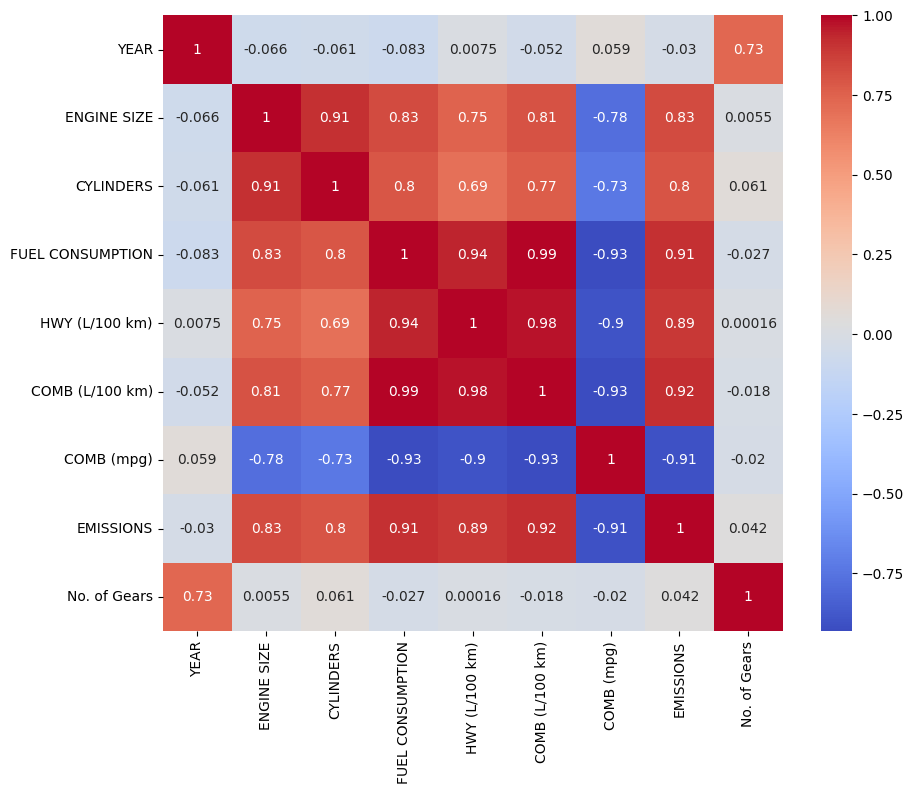

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(),annot=True, cmap= 'coolwarm');

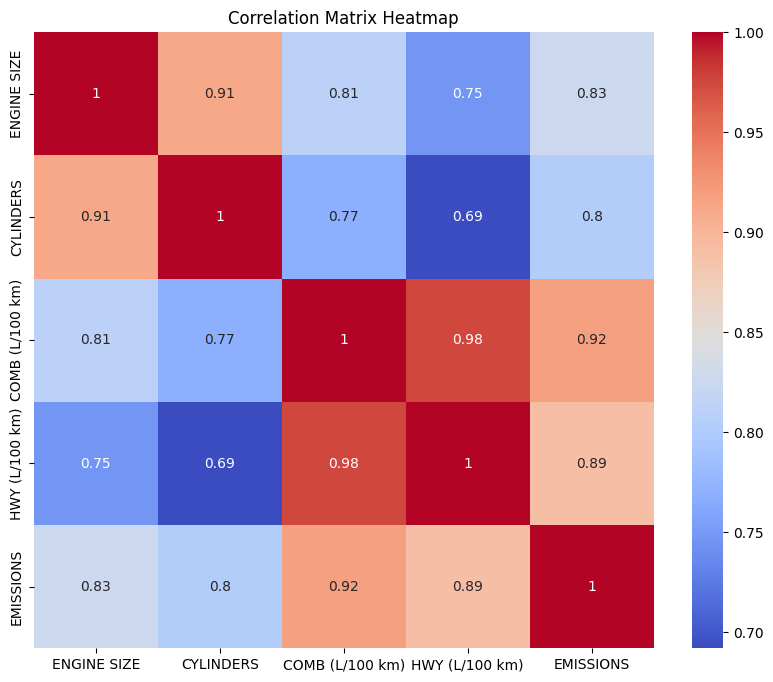

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = fuel_con[['ENGINE SIZE', 'CYLINDERS', 'COMB (L/100 km)', 'HWY (L/100 km)', 'EMISSIONS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [67]:
# Calculate the number of data points in the dataset
num_data_points = len(fuel_con)

# Calculate the number of bins using the Square Root Rule
num_bins = int(np.sqrt(num_data_points))

print("Number of Data Points:", num_data_points)
print("Number of Bins (Square Root Rule):", num_bins)

Number of Data Points: 21739
Number of Bins (Square Root Rule): 147


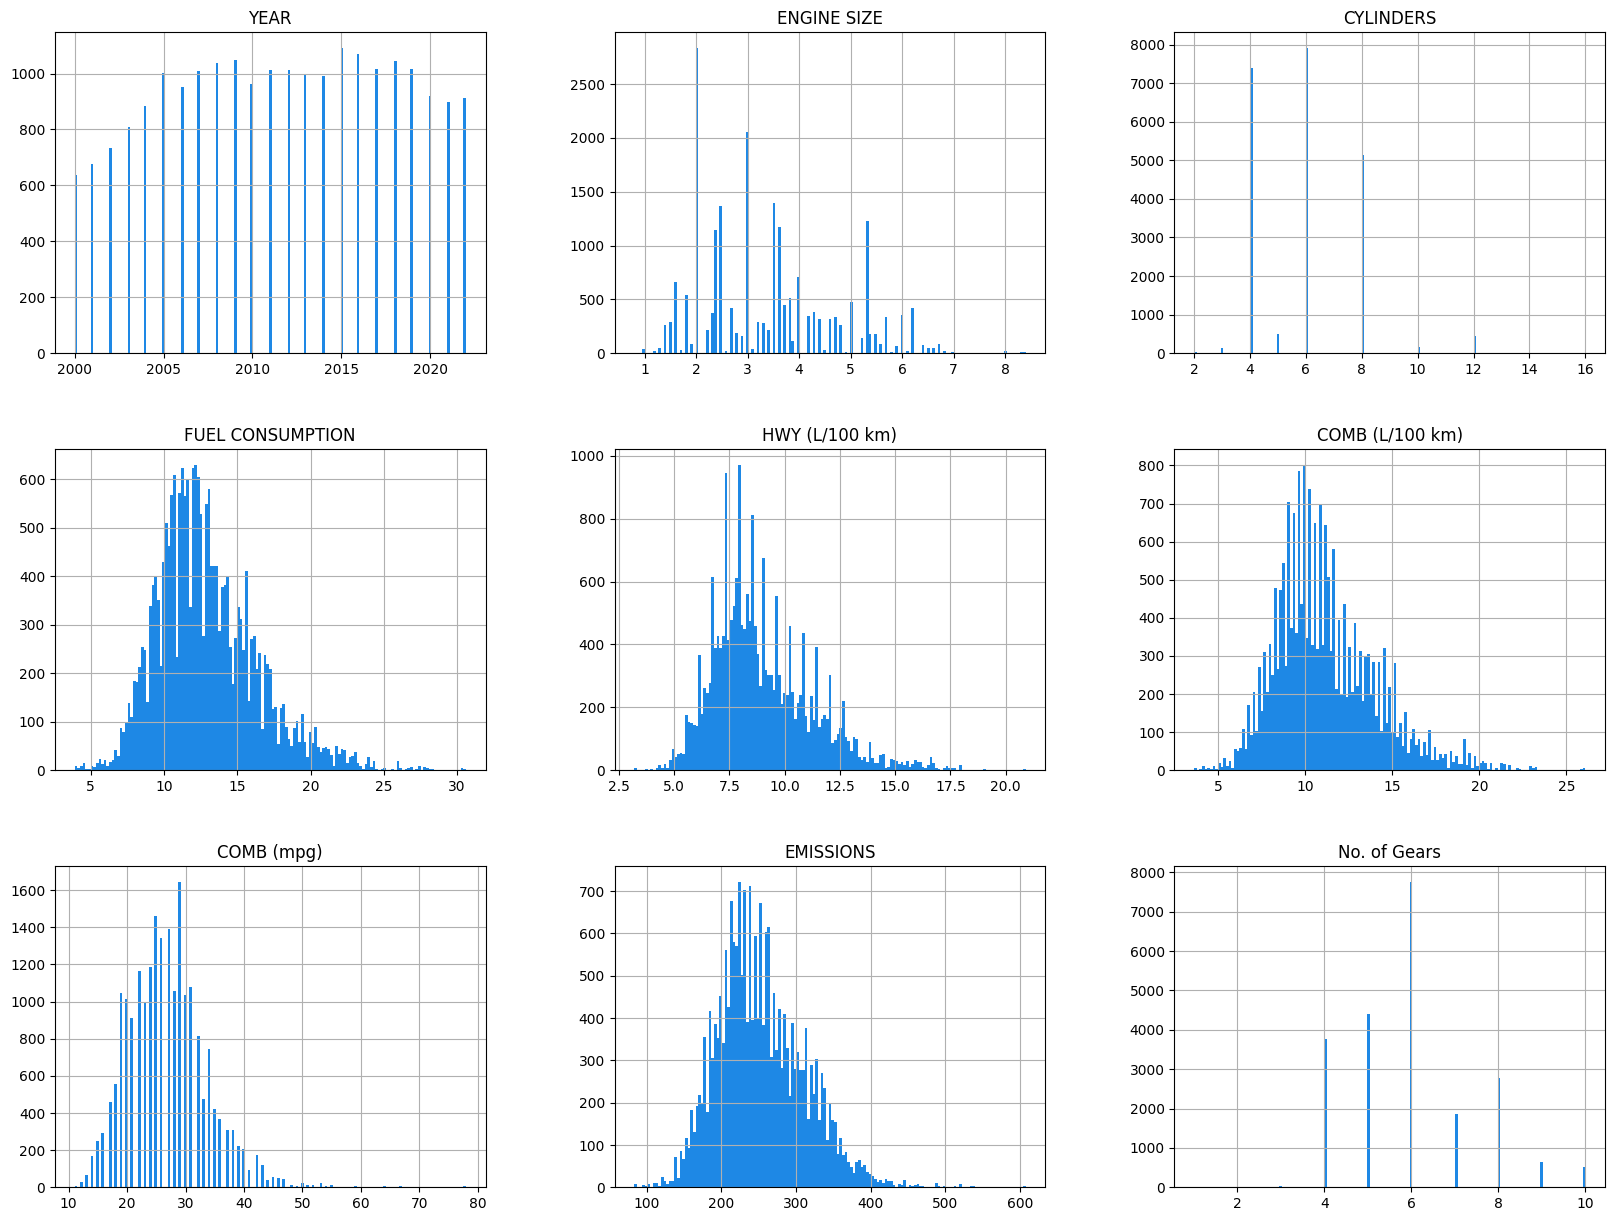

In [69]:
fuel_con.hist(bins=147, figsize=(20,15), color='#1E88E5')
plt.show()

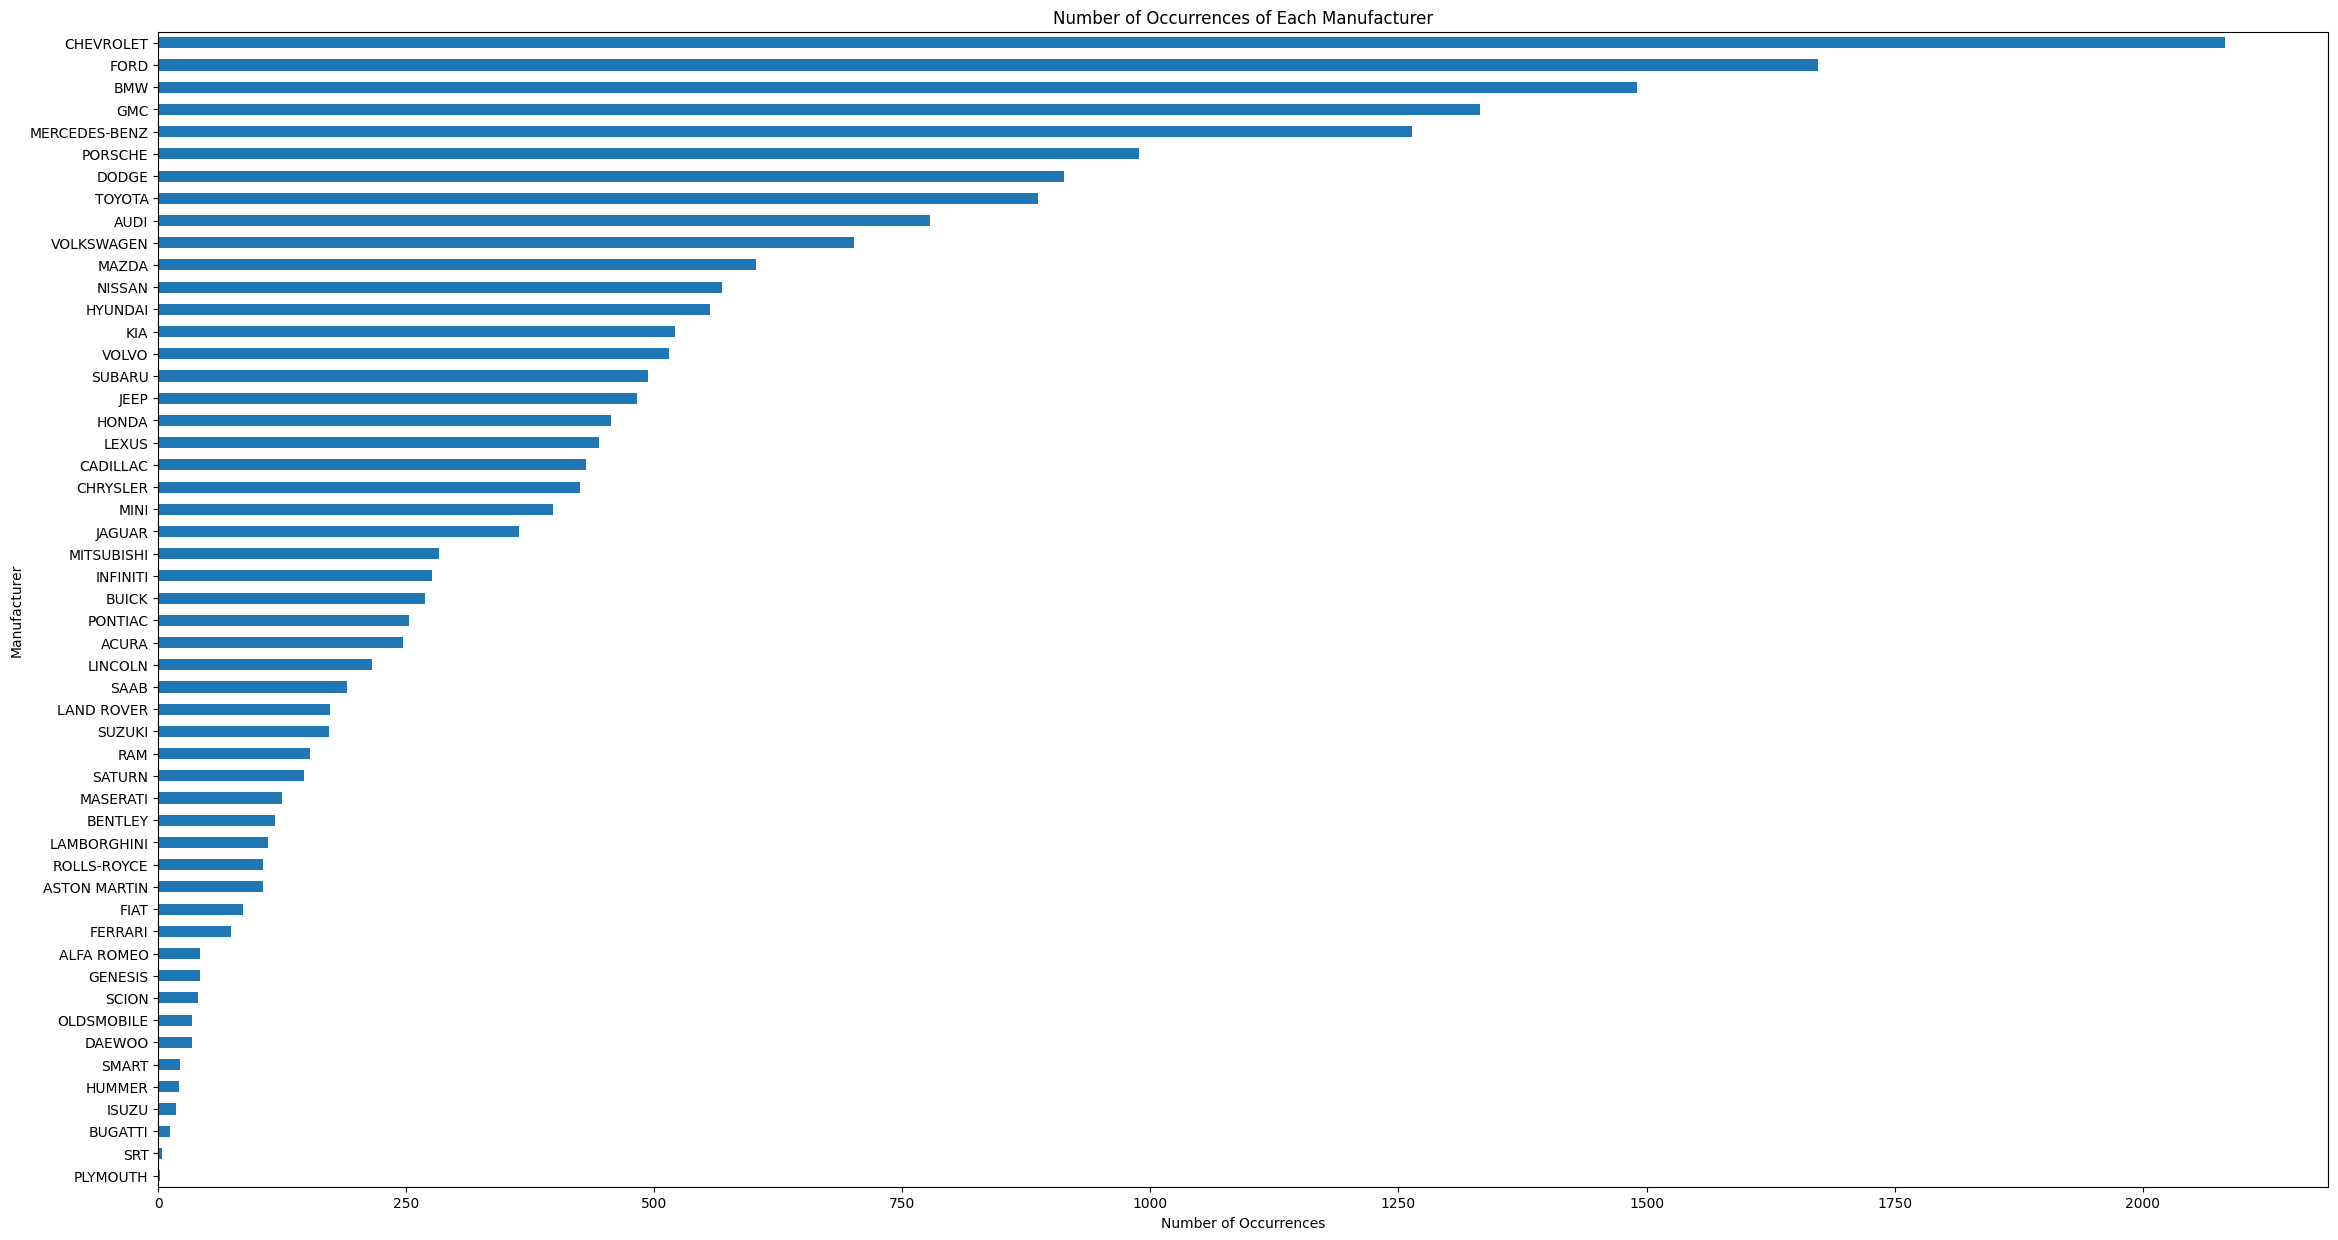

In [28]:
# Group by 'MAKE' and count the occurrences of each manufacturer
make_counts = fuel_con['MAKE'].value_counts().sort_values(ascending=True)

# Create a bar plot of the counts
plt.figure(figsize=(28,15))
make_counts.plot(kind='barh')
plt.xlabel('Number of Occurrences')
plt.ylabel('Manufacturer')
plt.title('Number of Occurrences of Each Manufacturer')
plt.show()

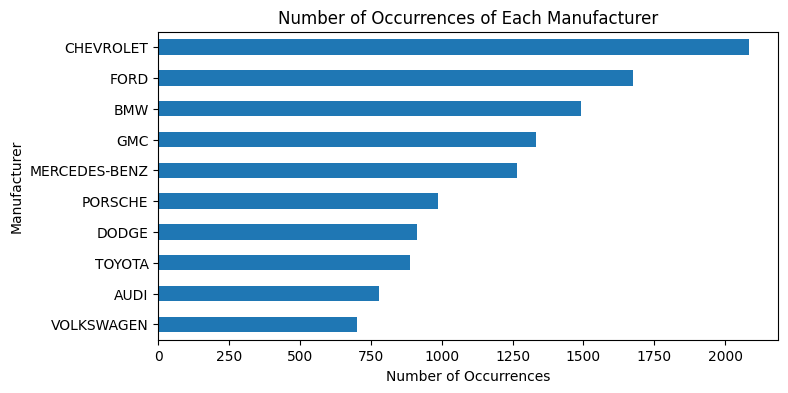

In [29]:
# Create a bar plot of the counts
plt.figure(figsize=(8,4))
make_counts.tail(10).plot(kind='barh')
plt.xlabel('Number of Occurrences')
plt.ylabel('Manufacturer')
plt.title('Number of Occurrences of Each Manufacturer')
plt.show()

In [30]:
fuel_con.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,No. of Gears
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,4.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,5.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,5.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,4.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,4.0


In [31]:
fuel_con['VEHICLE CLASS'].unique()


array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATIONWAGON-MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATIONWAGON-SMALL', 'FULL-SIZE',
       'SUV', 'VAN-CARGO', 'VAN-PASSENGER', 'PICKUPTRUCK-STANDARD',
       'PICKUPTRUCK-SMALL', 'MINIVAN', 'SUV-STANDARD',
       'SPECIALPURPOSEVEHICLE', 'SUV-SMALL'], dtype=object)

In [32]:
fuel_con.count()

,0
YEAR,21739
MAKE,21739
MODEL,21739
VEHICLE CLASS,21739
ENGINE SIZE,21739
CYLINDERS,21739
TRANSMISSION,21739
FUEL,21739
FUEL CONSUMPTION,21739
HWY (L/100 km),21739


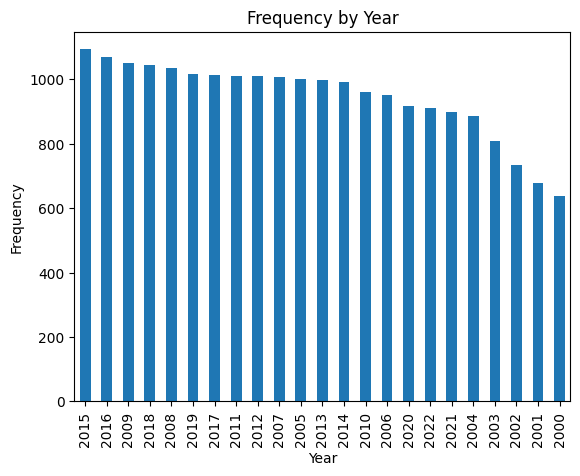

In [33]:
Freq_by_year = fuel_con['YEAR'].value_counts()
Freq_by_year.plot(kind='bar', title='Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


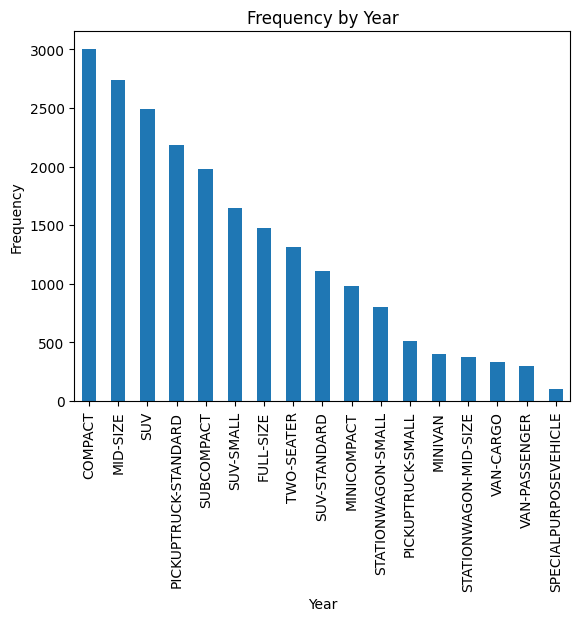

In [34]:
Freq_by_year = fuel_con['VEHICLE CLASS'].value_counts()
Freq_by_year.plot(kind='bar', title='Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


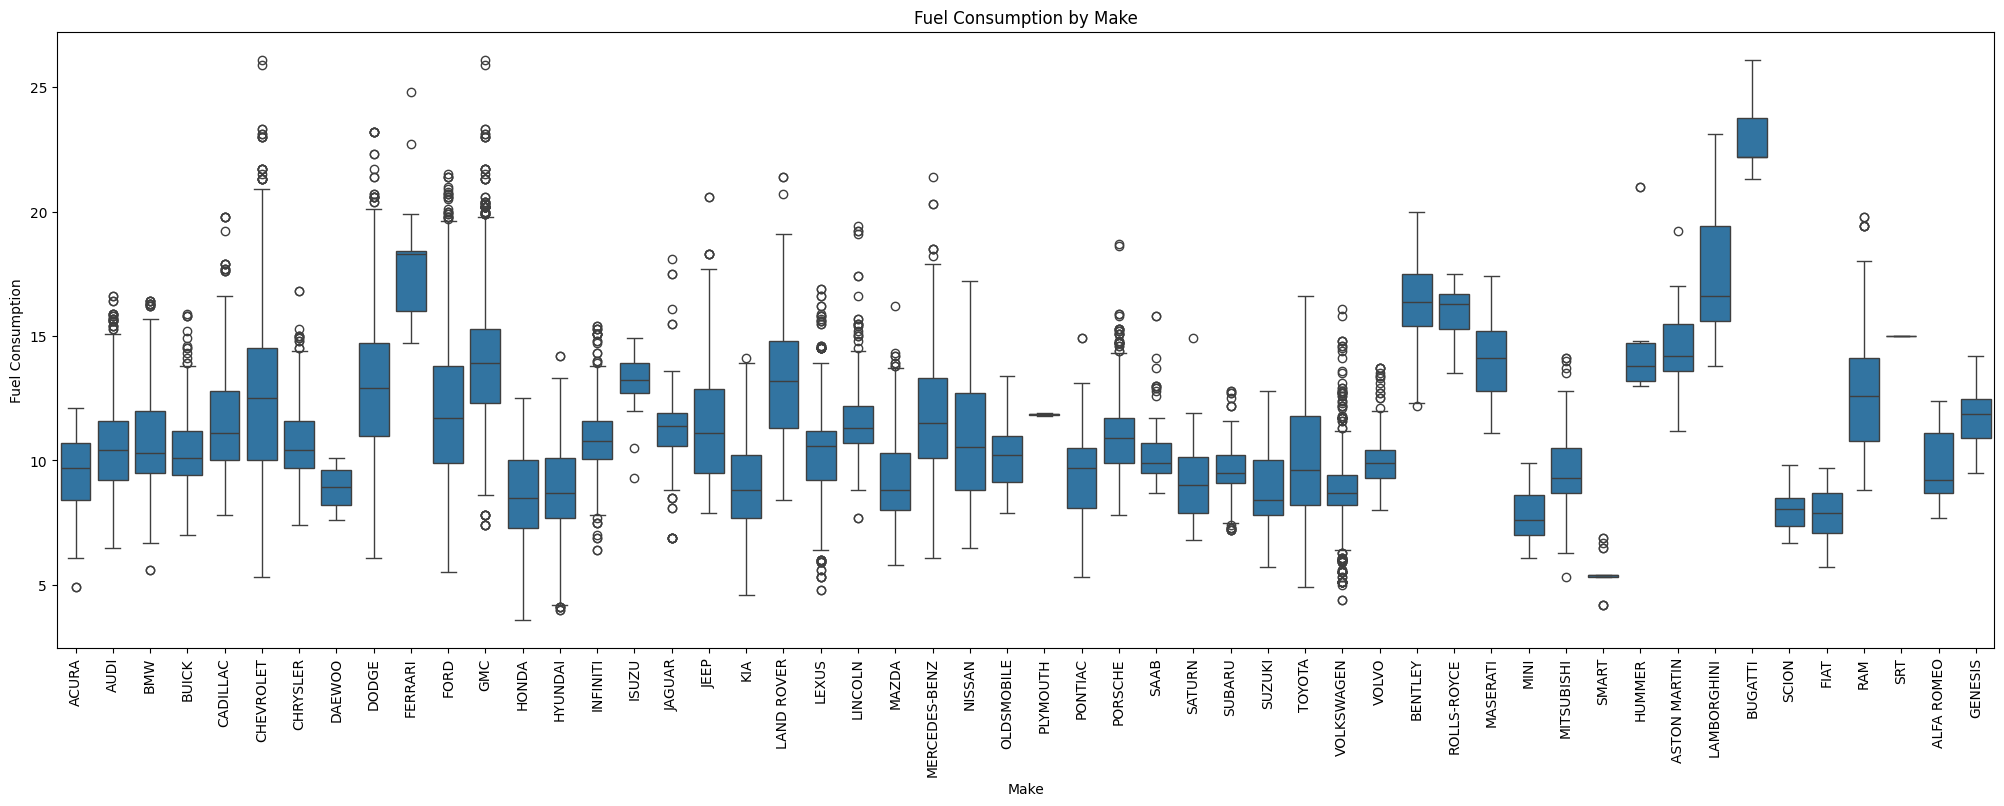

In [35]:
# Box Plot of Fuel Consumption by Make
plt.figure(figsize=(25, 8))
sns.boxplot(x='MAKE', y='COMB (L/100 km)', data=fuel_con)
plt.title('Fuel Consumption by Make')
plt.xlabel('Make')
plt.ylabel('Fuel Consumption')
plt.xticks(rotation=90)
plt.show()


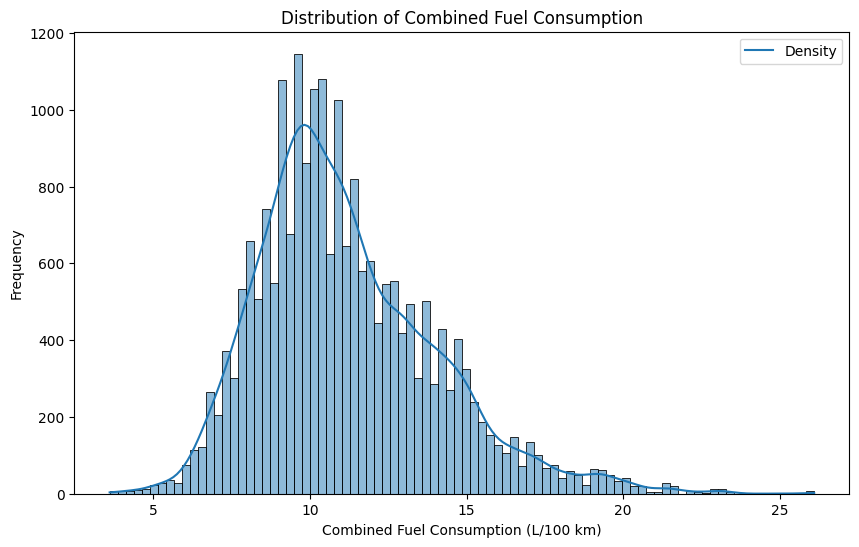

In [36]:

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=fuel_con, x='COMB (L/100 km)', kde=True)
plt.title('Distribution of Combined Fuel Consumption')
plt.xlabel('Combined Fuel Consumption (L/100 km)')
plt.ylabel('Frequency')
plt.legend(labels=['Density'])
plt.show()


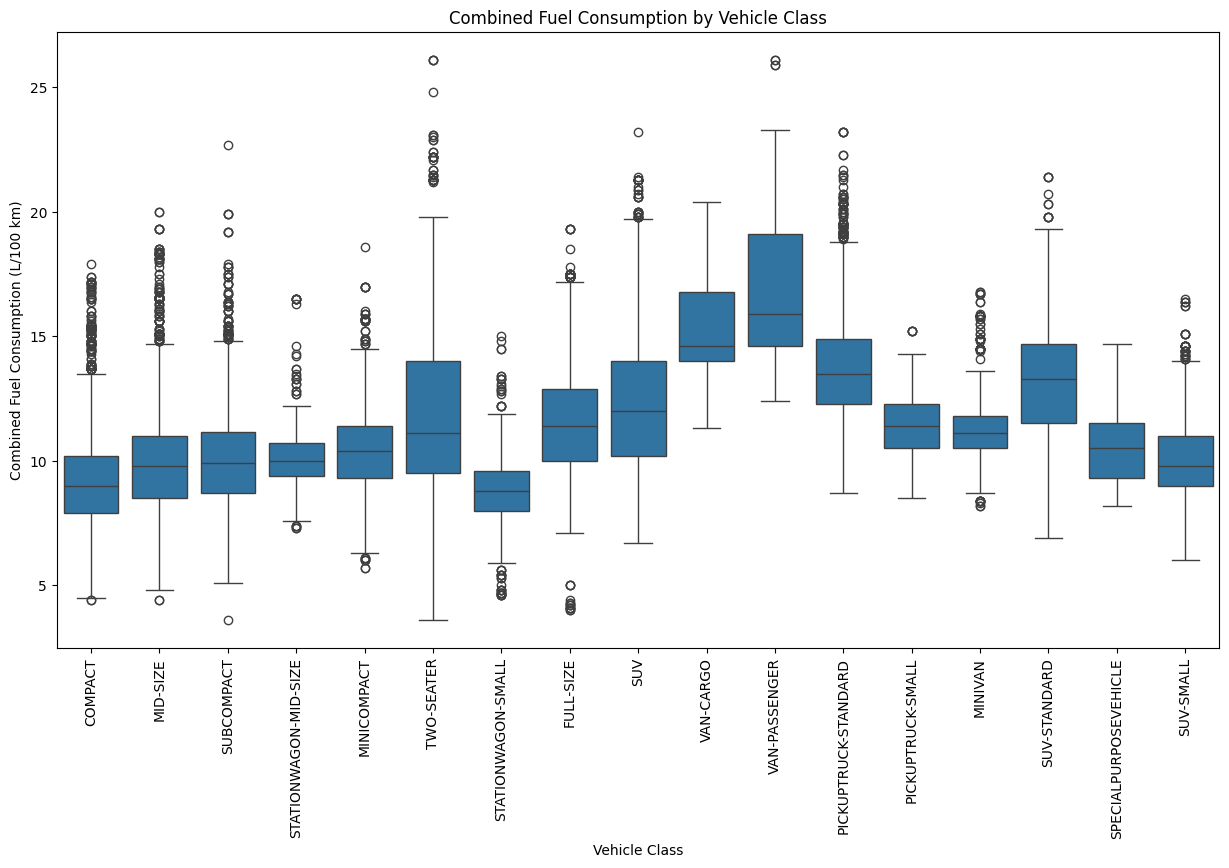

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=fuel_con, x='VEHICLE CLASS', y='COMB (L/100 km)')
plt.title('Combined Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Combined Fuel Consumption (L/100 km)')
plt.xticks(rotation=90)
plt.show()


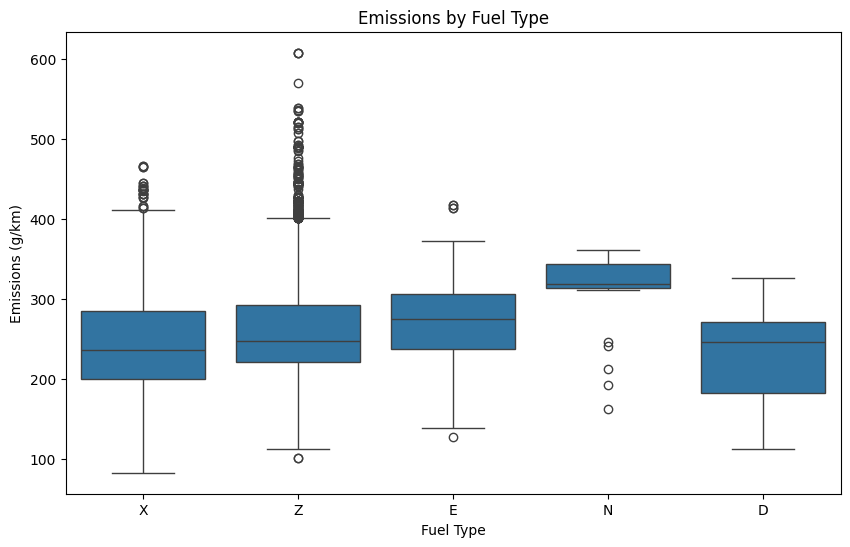

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fuel_con, x='FUEL', y='EMISSIONS')
plt.title('Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Emissions (g/km)')
plt.show()


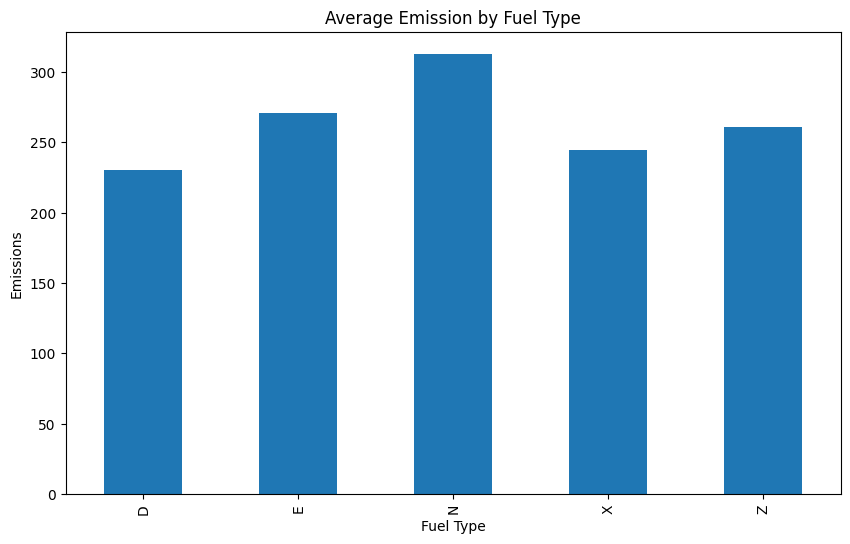

In [39]:
plt.figure(figsize=(10, 6))
fuel_con.groupby('FUEL')['EMISSIONS'].mean().plot(kind='bar')
plt.title('Average Emission by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Emissions')
plt.show()

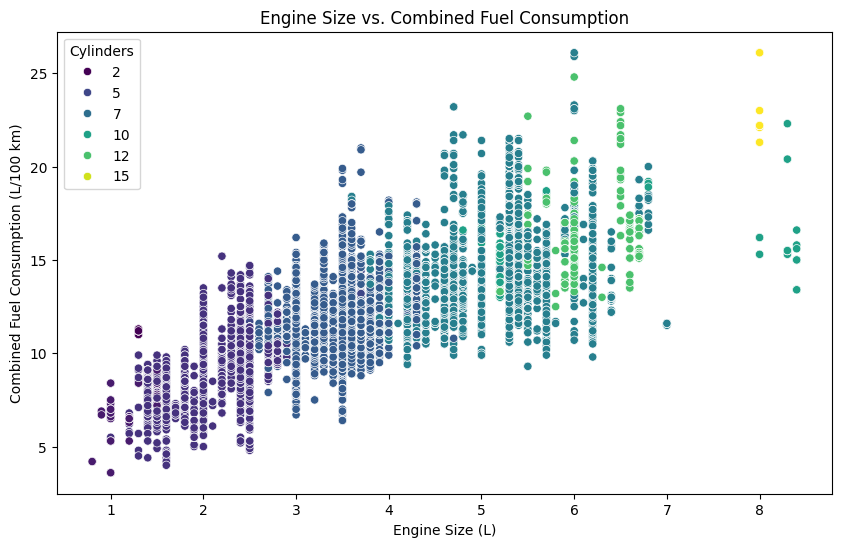

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fuel_con, x='ENGINE SIZE', y='COMB (L/100 km)', hue='CYLINDERS', palette='viridis')
plt.title('Engine Size vs. Combined Fuel Consumption')
plt.xlabel('Engine Size (L)')
plt.ylabel('Combined Fuel Consumption (L/100 km)')
plt.legend(title='Cylinders')
plt.show()


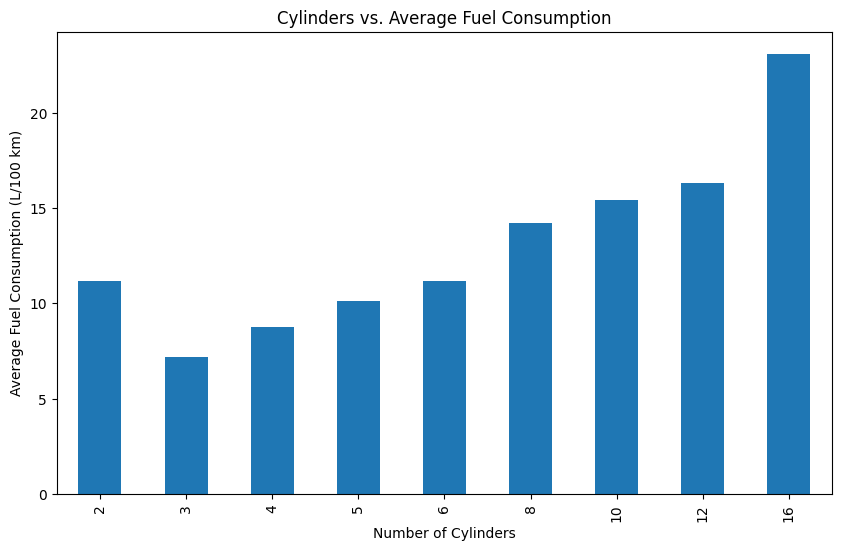

In [70]:
plt.figure(figsize=(10, 6))
fuel_con.groupby('CYLINDERS')['COMB (L/100 km)'].mean().plot(kind='bar')
plt.title('Cylinders vs. Average Fuel Consumption')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.show()

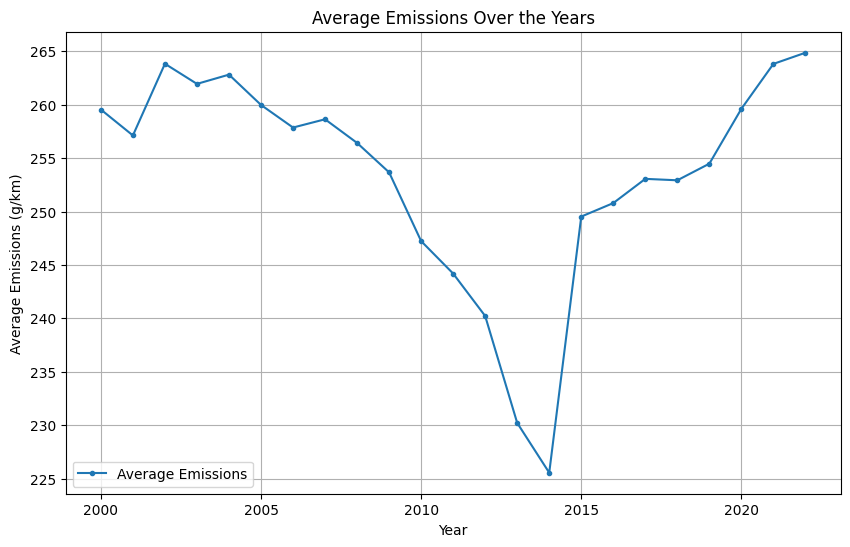

In [42]:
import matplotlib.pyplot as plt

# Calculate the average emissions per year
average_emissions = fuel_con.groupby('YEAR')['EMISSIONS'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(average_emissions['YEAR'], average_emissions['EMISSIONS'], label='Average Emissions', marker='.')

# Adding titles and labels
plt.title('Average Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Emissions (g/km)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


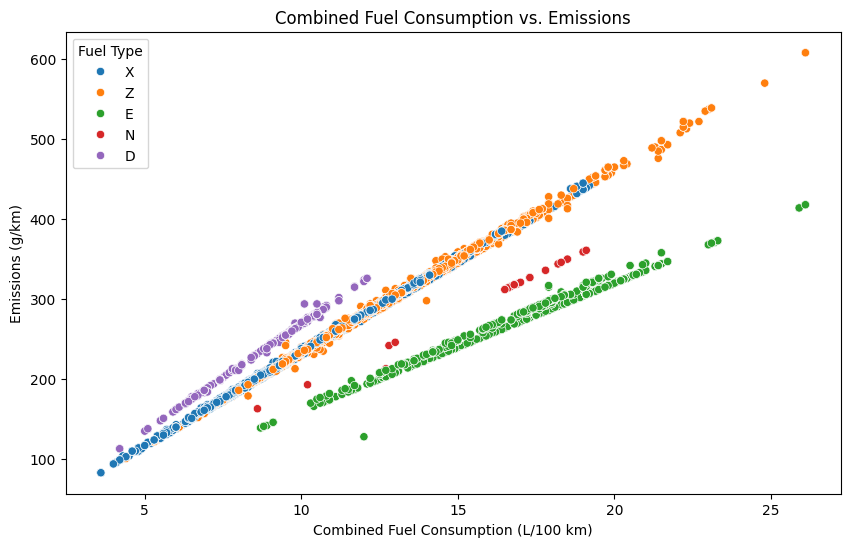

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fuel_con, x='COMB (L/100 km)', y='EMISSIONS', hue='FUEL', palette='tab10')
plt.title('Combined Fuel Consumption vs. Emissions')
plt.xlabel('Combined Fuel Consumption (L/100 km)')
plt.ylabel('Emissions (g/km)')
plt.legend(title='Fuel Type')
plt.show()


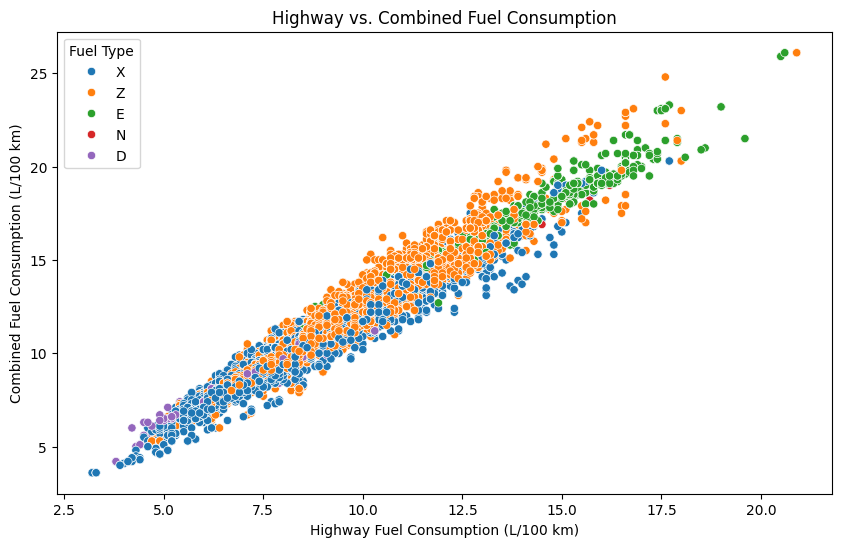

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fuel_con, x='HWY (L/100 km)', y='COMB (L/100 km)', hue='FUEL', palette='tab10')
plt.title('Highway vs. Combined Fuel Consumption')
plt.xlabel('Highway Fuel Consumption (L/100 km)')
plt.ylabel('Combined Fuel Consumption (L/100 km)')
plt.legend(title='Fuel Type')
plt.show()


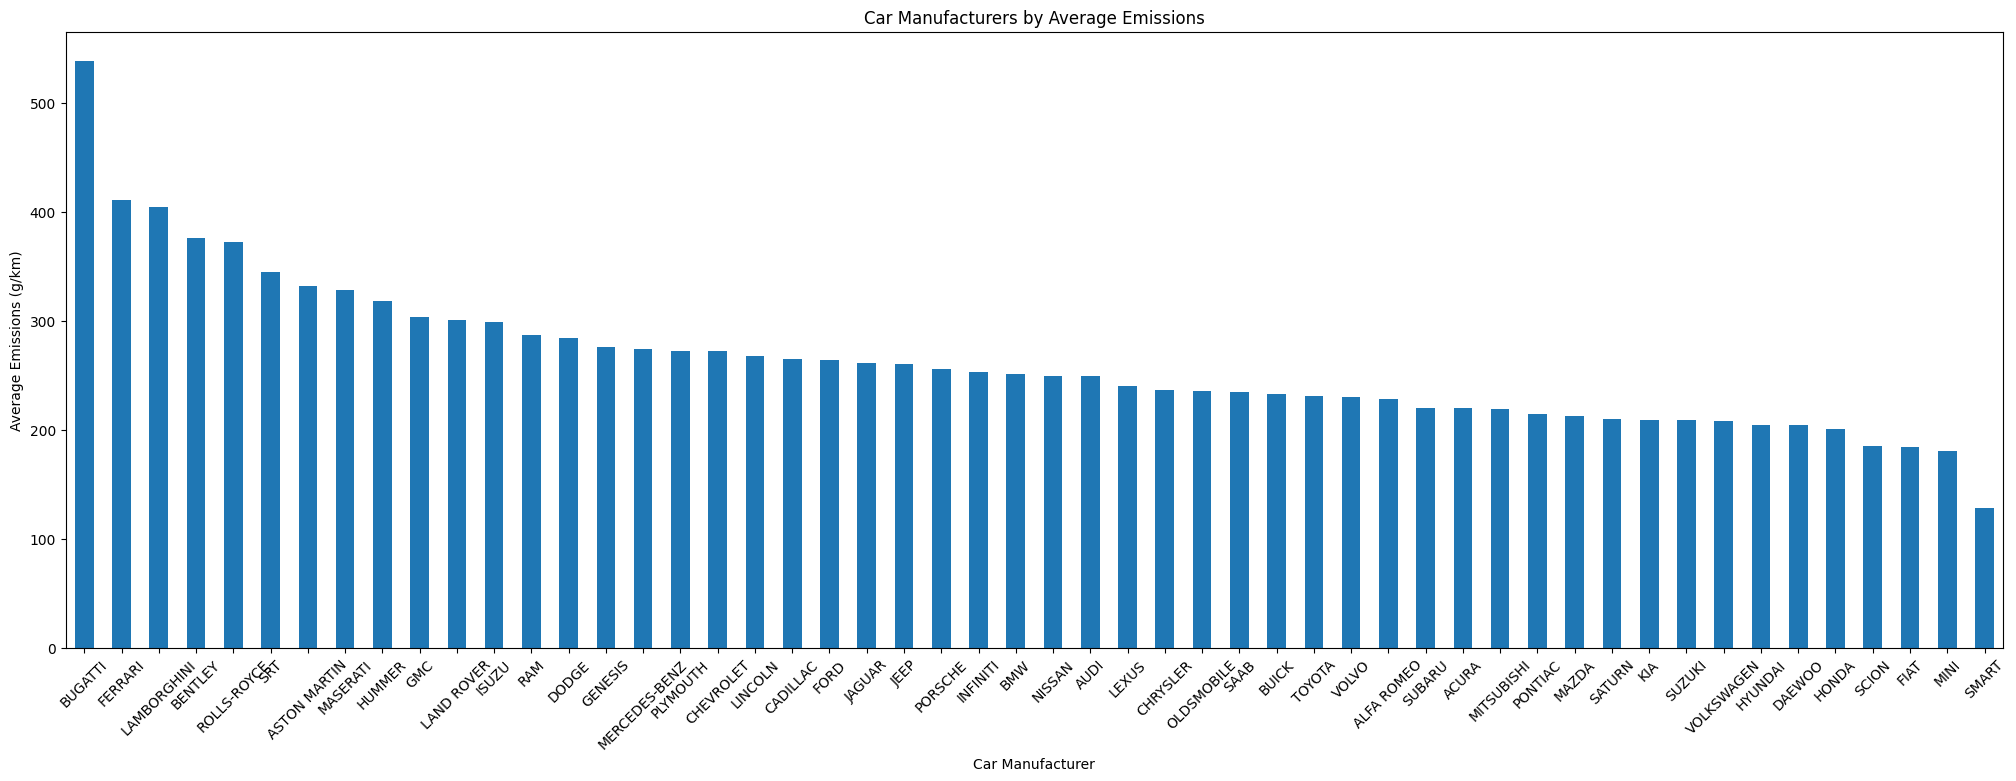

In [45]:
plt.figure(figsize=(25, 8))
average_emissions_by_make = fuel_con.groupby('MAKE')['EMISSIONS'].mean().sort_values(ascending=False)
average_emissions_by_make.plot(kind='bar')
plt.title('Car Manufacturers by Average Emissions')
plt.xlabel('Car Manufacturer')
plt.ylabel('Average Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()


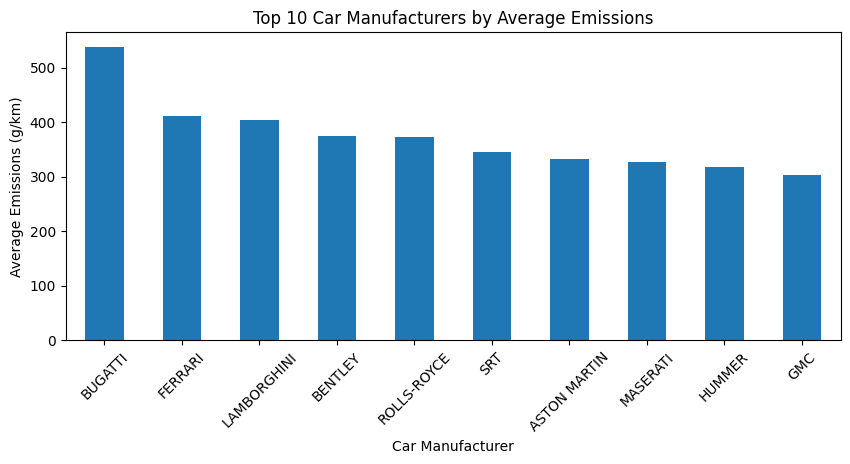

In [46]:
plt.figure(figsize=(10, 4))
average_emissions_by_make = fuel_con.groupby('MAKE')['EMISSIONS'].mean().sort_values(ascending=False)
average_emissions_by_make.head(10).plot(kind='bar')
plt.title('Top 10 Car Manufacturers by Average Emissions')
plt.xlabel('Car Manufacturer')
plt.ylabel('Average Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()


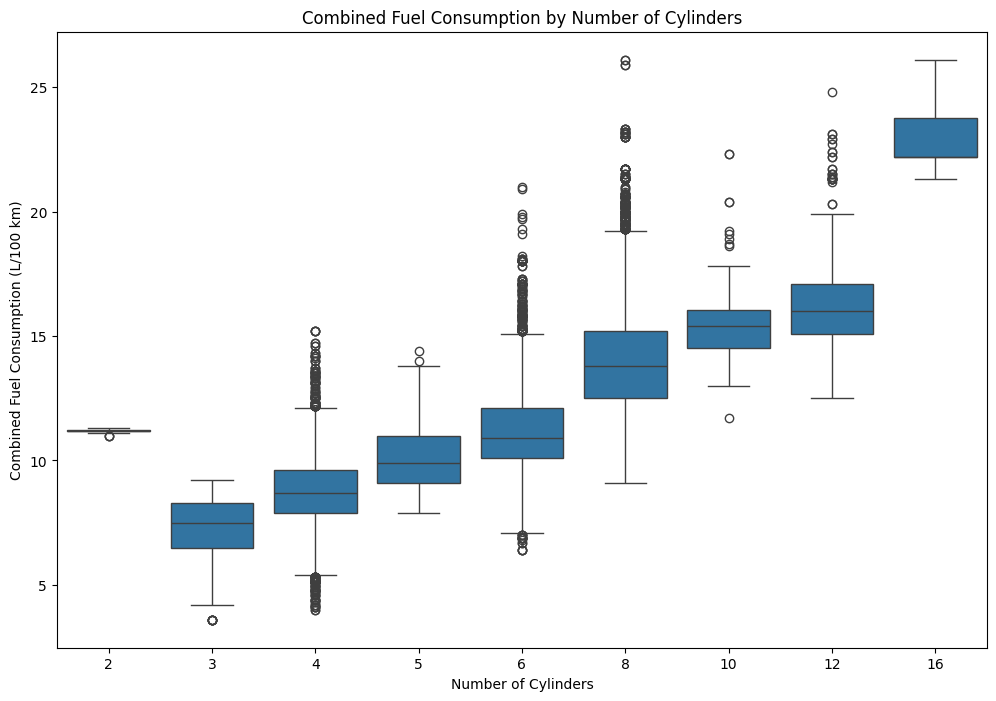

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=fuel_con, x='CYLINDERS', y='COMB (L/100 km)')
plt.title('Combined Fuel Consumption by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Combined Fuel Consumption (L/100 km)')
plt.show()


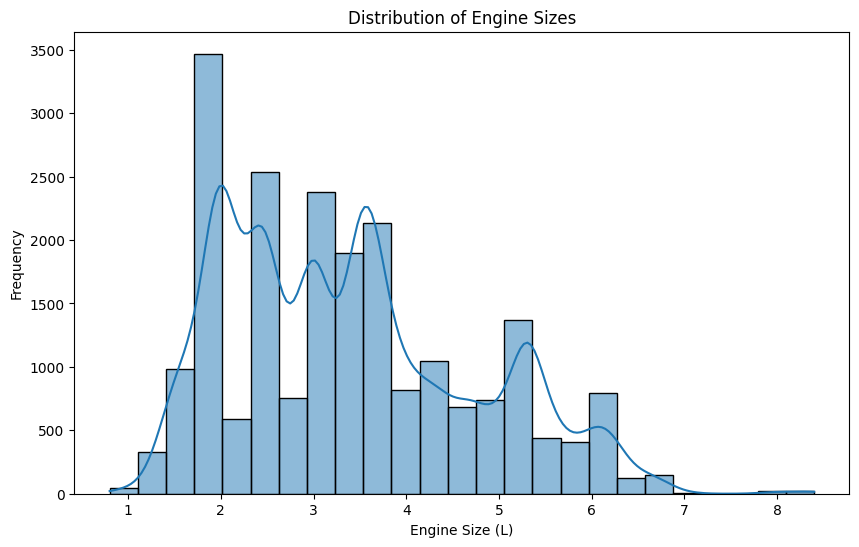

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(fuel_con['ENGINE SIZE'], bins=25, kde=True)
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size (L)')
plt.ylabel('Frequency')
plt.show()


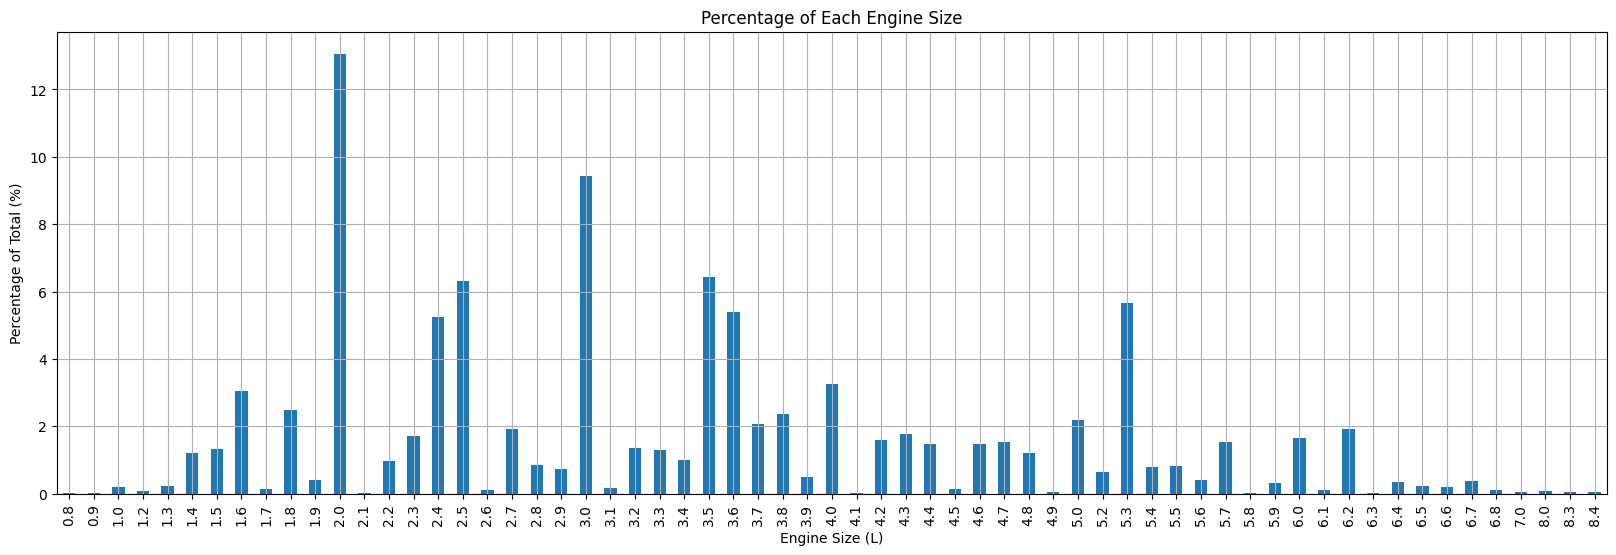

In [49]:

# Calculate the count of each engine size
engine_size_counts = fuel_con['ENGINE SIZE'].value_counts()

# Calculate the percentage of each engine size
engine_size_percentage = (engine_size_counts / len(fuel_con)) * 100

# Plot the percentage of each engine size using a bar plot
plt.figure(figsize=(20, 6))
engine_size_percentage.sort_index().plot(kind='bar')
plt.title('Percentage of Each Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Percentage of Total (%)')
plt.grid(True)
plt.show()


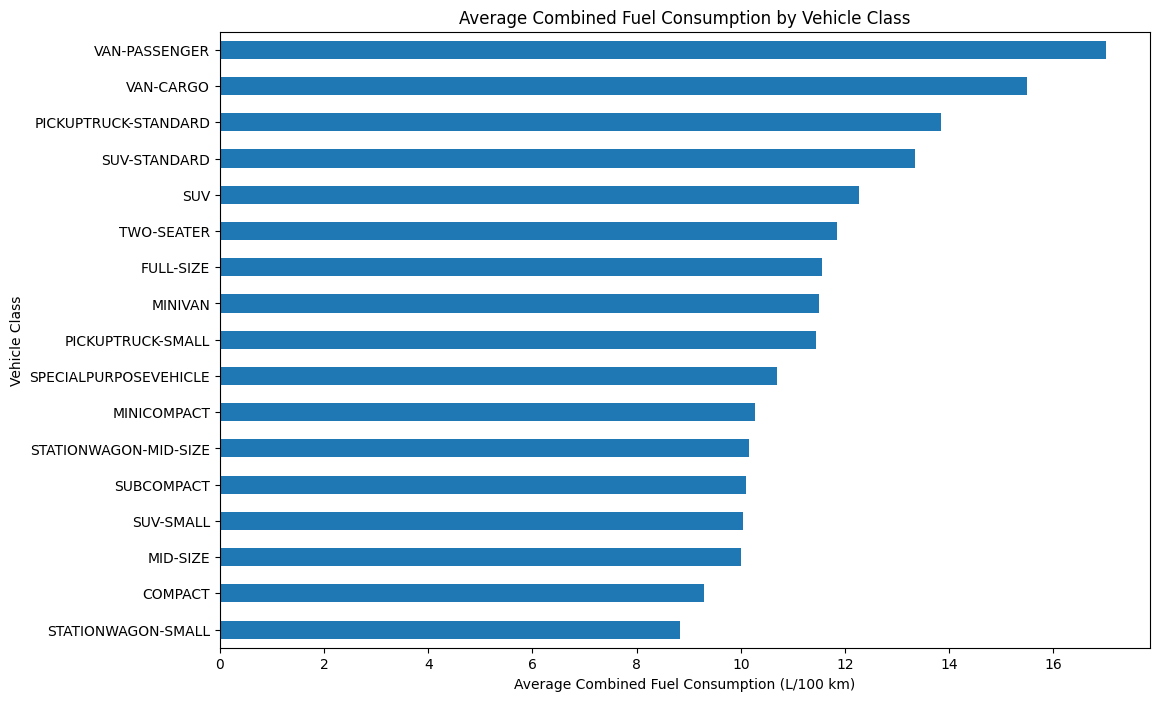

In [50]:
plt.figure(figsize=(12, 8))
average_fuel_consumption_by_class = fuel_con.groupby('VEHICLE CLASS')['COMB (L/100 km)'].mean().sort_values()
average_fuel_consumption_by_class.plot(kind='barh')
plt.title('Average Combined Fuel Consumption by Vehicle Class')
plt.xlabel('Average Combined Fuel Consumption (L/100 km)')
plt.ylabel('Vehicle Class')
plt.show()


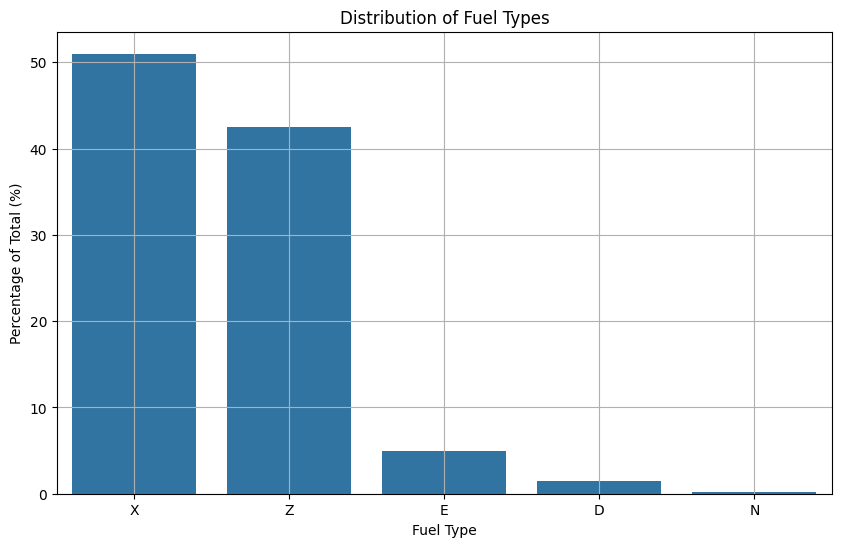

In [51]:
fuel_type_counts = fuel_con['FUEL'].value_counts()

# Calculate the percentage of each fuel type
fuel_type_percentage = (fuel_type_counts / len(fuel_con)) * 100

# Create a bar plot of the percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_type_percentage.index, y=fuel_type_percentage.values)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Percentage of Total (%)')
plt.grid(True)
plt.show()

# Step 5: Data Exploration


# Step 6: ML Model Building & Evaluation
Building:

-Linear Regression

-Decision Trees

-Random Forest

-SVM/SVR (Support Vector Regression)

-XGBoost

In [173]:
fuel_con.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS', 'No. of Gears'],
      dtype='object')

In [174]:
fuel_con.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,No. of Gears
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,4.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,5.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,5.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,4.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,4.0


In [175]:
# # One hot encoding
# encoded_df1 = pd.get_dummies(fuel_con, columns=['FUEL'],drop_first=False)
# encoded_df2= pd.get_dummies(fuel_con, columns=['VEHICLE CLASS'],drop_first=False)
# #Concatenating the columns
# encoded_df= pd.concat([encoded_df1, encoded_df2], axis=1)
# encoded_df.columns

In [176]:
cat_encoder = OneHotEncoder(sparse_output=False)

# Change the "FUEL" column into one-hot encoding

fuel_type =  fuel_con[['FUEL']]
fuel_cat_1hot = cat_encoder.fit_transform(fuel_type)

fuel_cat_1hot_df = pd.DataFrame(fuel_cat_1hot, columns=cat_encoder.get_feature_names_out())

# Add the one-hot encoded "FUEL" data into the initial dataset
Full_dataset = pd.concat([fuel_con, fuel_cat_1hot_df], axis=1)
Full_dataset.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,No. of Gears,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,2000.0,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0,4.0,0.0,0.0,0.0,1.0,0.0
1,2000.0,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0,5.0,0.0,0.0,0.0,1.0,0.0
2,2000.0,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0,5.0,0.0,0.0,0.0,0.0,1.0
3,2000.0,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0,4.0,0.0,0.0,0.0,0.0,1.0
4,2000.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0,4.0,0.0,0.0,0.0,1.0,0.0


In [177]:
# Change the "TRANSMISSION" column into one-hot encoding

TRANSMISSION_cat =  fuel_con[['TRANSMISSION']]
TRANSMISSION_cat_1hot = cat_encoder.fit_transform(TRANSMISSION_cat)

TRANSMISSION_cat_1hot_df = pd.DataFrame(TRANSMISSION_cat_1hot, columns=cat_encoder.get_feature_names_out())

# Add the one-hot encoded "TRANSMISSION" data into the initial dataset
Full_dataset2 = pd.concat([Full_dataset, TRANSMISSION_cat_1hot_df], axis=1)
Full_dataset2.columns


Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS', 'No. of Gears', 'FUEL_D',
       'FUEL_E', 'FUEL_N', 'FUEL_X', 'FUEL_Z', 'TRANSMISSION_A10',
       'TRANSMISSION_A3', 'TRANSMISSION_A4', 'TRANSMISSION_A5',
       'TRANSMISSION_A6', 'TRANSMISSION_A7', 'TRANSMISSION_A8',
       'TRANSMISSION_A9', 'TRANSMISSION_AM5', 'TRANSMISSION_AM6',
       'TRANSMISSION_AM7', 'TRANSMISSION_AM8', 'TRANSMISSION_AM9',
       'TRANSMISSION_AS10', 'TRANSMISSION_AS4', 'TRANSMISSION_AS5',
       'TRANSMISSION_AS6', 'TRANSMISSION_AS7', 'TRANSMISSION_AS8',
       'TRANSMISSION_AS9', 'TRANSMISSION_AV1', 'TRANSMISSION_AV10',
       'TRANSMISSION_AV6', 'TRANSMISSION_AV7', 'TRANSMISSION_AV8',
       'TRANSMISSION_M4', 'TRANSMISSION_M5', 'TRANSMISSION_M6',
       'TRANSMISSION_M7'],
      dtype='object')

In [178]:
# Change the "VEHICLE CLASS" column into one-hot encoding

VEHICLE_CLASS_cat =  fuel_con[['VEHICLE CLASS']]
VEHICLE_CLASS_cat_1hot = cat_encoder.fit_transform(VEHICLE_CLASS_cat)

VEHICLE_CLASS_1hot_df = pd.DataFrame(VEHICLE_CLASS_cat_1hot, columns=cat_encoder.get_feature_names_out())

# Add the one-hot encoded "VEHICLE CLASS" data into the initial dataset
Full_dataset3 = pd.concat([Full_dataset2, VEHICLE_CLASS_1hot_df], axis=1)
Full_dataset3.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS', 'No. of Gears', 'FUEL_D',
       'FUEL_E', 'FUEL_N', 'FUEL_X', 'FUEL_Z', 'TRANSMISSION_A10',
       'TRANSMISSION_A3', 'TRANSMISSION_A4', 'TRANSMISSION_A5',
       'TRANSMISSION_A6', 'TRANSMISSION_A7', 'TRANSMISSION_A8',
       'TRANSMISSION_A9', 'TRANSMISSION_AM5', 'TRANSMISSION_AM6',
       'TRANSMISSION_AM7', 'TRANSMISSION_AM8', 'TRANSMISSION_AM9',
       'TRANSMISSION_AS10', 'TRANSMISSION_AS4', 'TRANSMISSION_AS5',
       'TRANSMISSION_AS6', 'TRANSMISSION_AS7', 'TRANSMISSION_AS8',
       'TRANSMISSION_AS9', 'TRANSMISSION_AV1', 'TRANSMISSION_AV10',
       'TRANSMISSION_AV6', 'TRANSMISSION_AV7', 'TRANSMISSION_AV8',
       'TRANSMISSION_M4', 'TRANSMISSION_M5', 'TRANSMISSION_M6',
       'TRANSMISSION_M7', 'VEHICLE CLASS_COMPACT', 'VEHICLE CLASS_FULL-SIZE',
       'VEHICLE CLASS_MID-SIZE', 'V

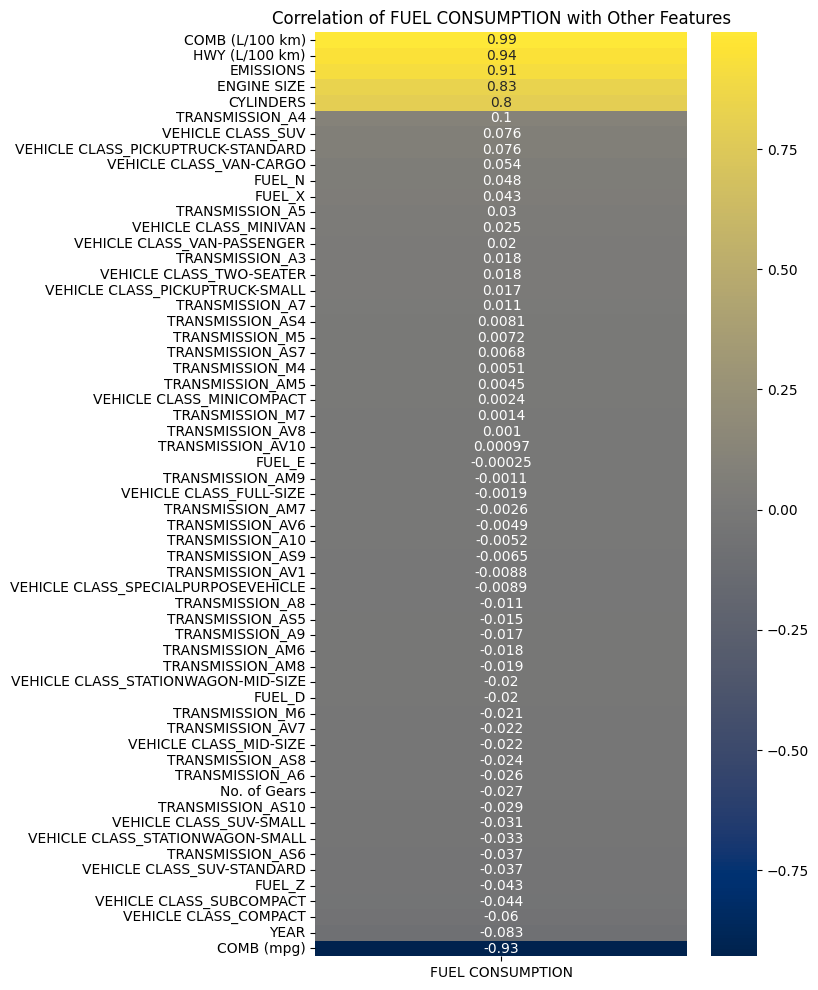

In [179]:
# drop non numeric columns
numeric_data23 = Full_dataset3.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data23.corr()

fuelcon_corr = correlation_matrix['FUEL CONSUMPTION']
fuelcon_corr_df = fuelcon_corr.drop(['FUEL CONSUMPTION']).to_frame()

# Sort correlation values
fuelcon_df_sorted = fuelcon_corr_df.sort_values(by='FUEL CONSUMPTION', ascending=False)

# Plotting
plt.figure(figsize=(6, 12))
sns.heatmap(fuelcon_df_sorted, annot=True, cmap='cividis')
plt.title('Correlation of FUEL CONSUMPTION with Other Features')
plt.show()

In [180]:
# from sklearn.ensemble import RandomForestRegressor

# # Select columns with numeric values
# numeric_data23 = Full_dataset3.select_dtypes(include=['number'])

# # Define features and labels for the random forest regressor
# X = numeric_data23.drop(['FUEL CONSUMPTION'], axis=1)
# y = numeric_data23['FUEL CONSUMPTION']

# # Train a RandomForestRegressor model
# rf = RandomForestRegressor()
# rf.fit(X, y)

# # Plot feature importances
# importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]
# plt.figure(figsize=(8, 10))
# plt.title("Feature Importances")
# plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")
# plt.yticks(range(X.shape[1]), X.columns[indices])
# plt.ylim([-1, X.shape[1]])  # y-axis limit
# plt.show()

# Was giving nan error

In [181]:
numeric_data23.isna().sum()

,0
YEAR,774
ENGINE SIZE,774
CYLINDERS,774
FUEL CONSUMPTION,774
HWY (L/100 km),774
COMB (L/100 km),774
COMB (mpg),774
EMISSIONS,774
No. of Gears,774
FUEL_D,774


In [182]:
numeric_data24= numeric_data23.dropna()
numeric_data24.isna().sum().sum()

0

In [183]:
numeric_data24.count().mean()

20965.0

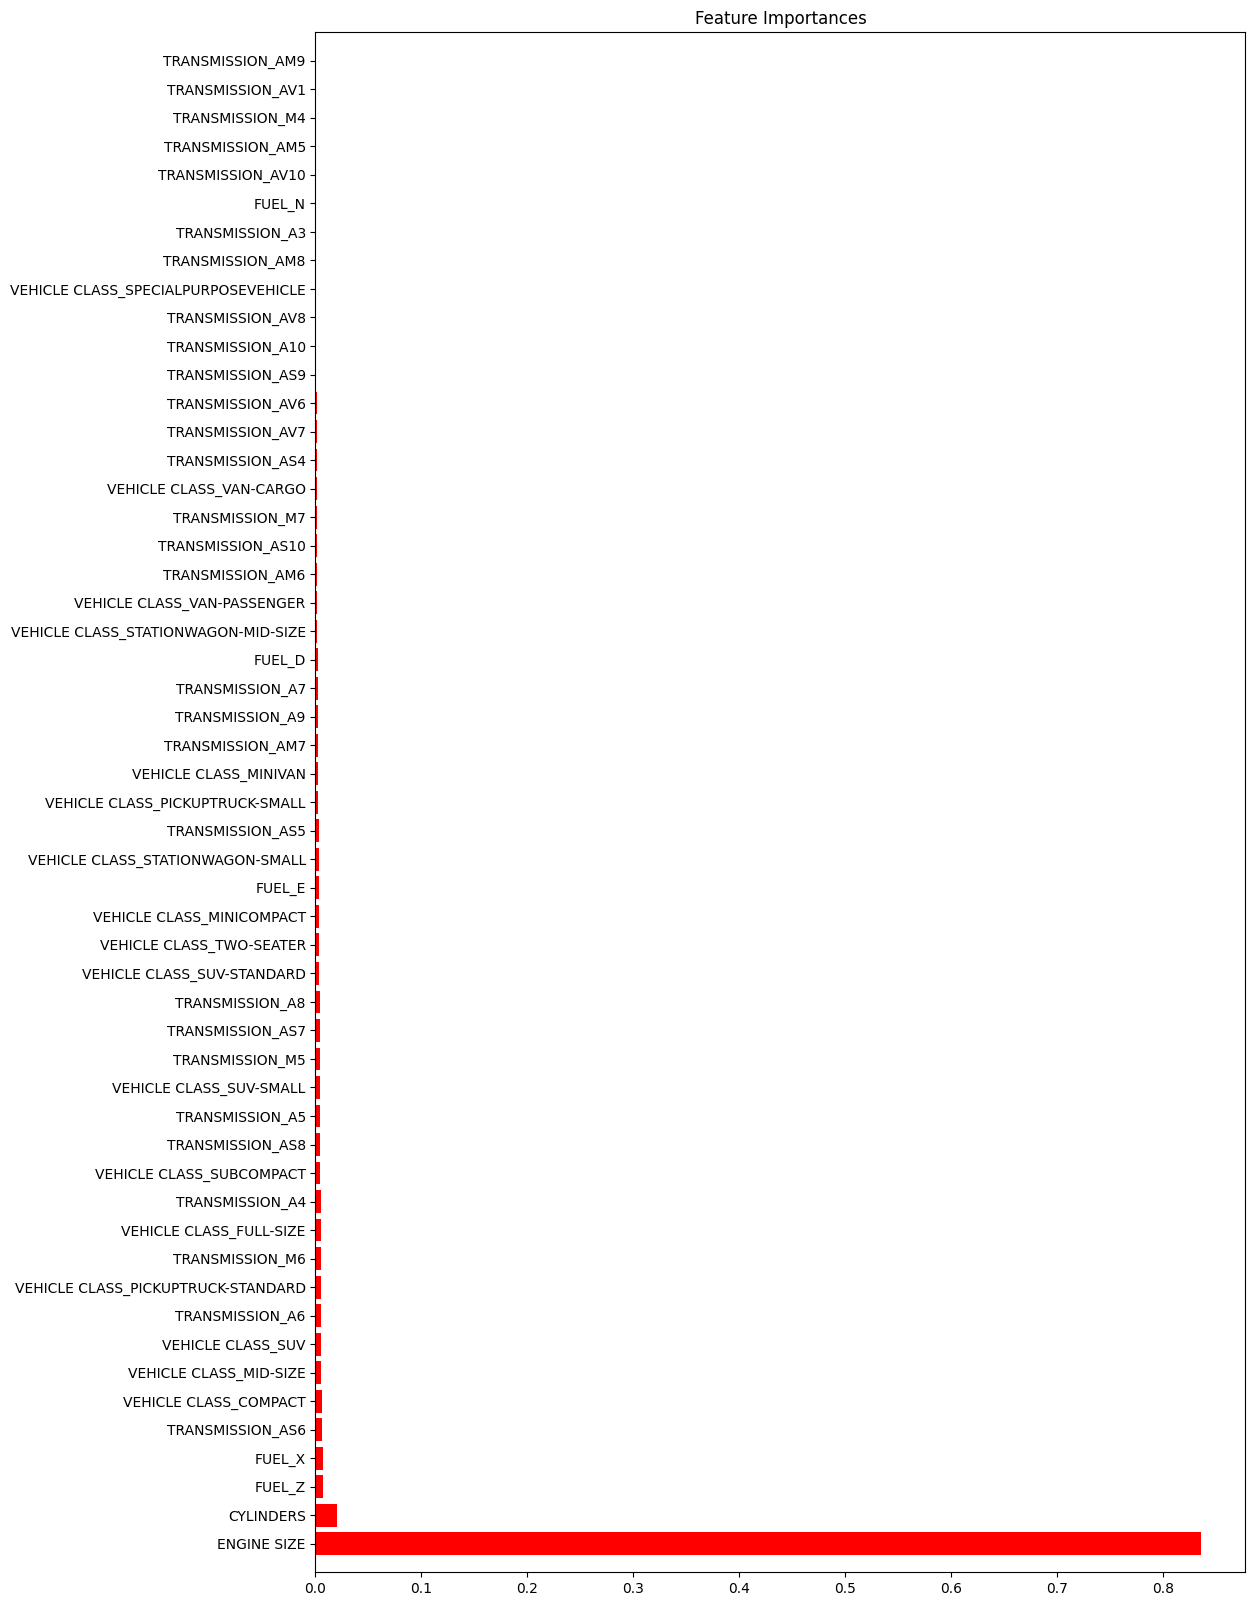

In [184]:

# Define features and labels for the random forest regressor
X = numeric_data24.drop(['COMB (L/100 km)','FUEL CONSUMPTION', 'HWY (L/100 km)','COMB (mpg)', 'YEAR', 'No. of Gears', 'EMISSIONS'], axis=1)
y = numeric_data24['COMB (L/100 km)']

# Train a RandomForestRegressor model
rf = RandomForestRegressor()
rf.fit(X, y)

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 20))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])  # y-axis limit
plt.show()

In [186]:
# encoded_df.to_csv('encoded_df.csv', index=False)

In [187]:
# encoded_df['FUEL_N'].unique()

In [188]:
# experiment= encoded_df.dropna()
# print(len(experiment))

In [189]:
fuel_con.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS', 'No. of Gears'],
      dtype='object')

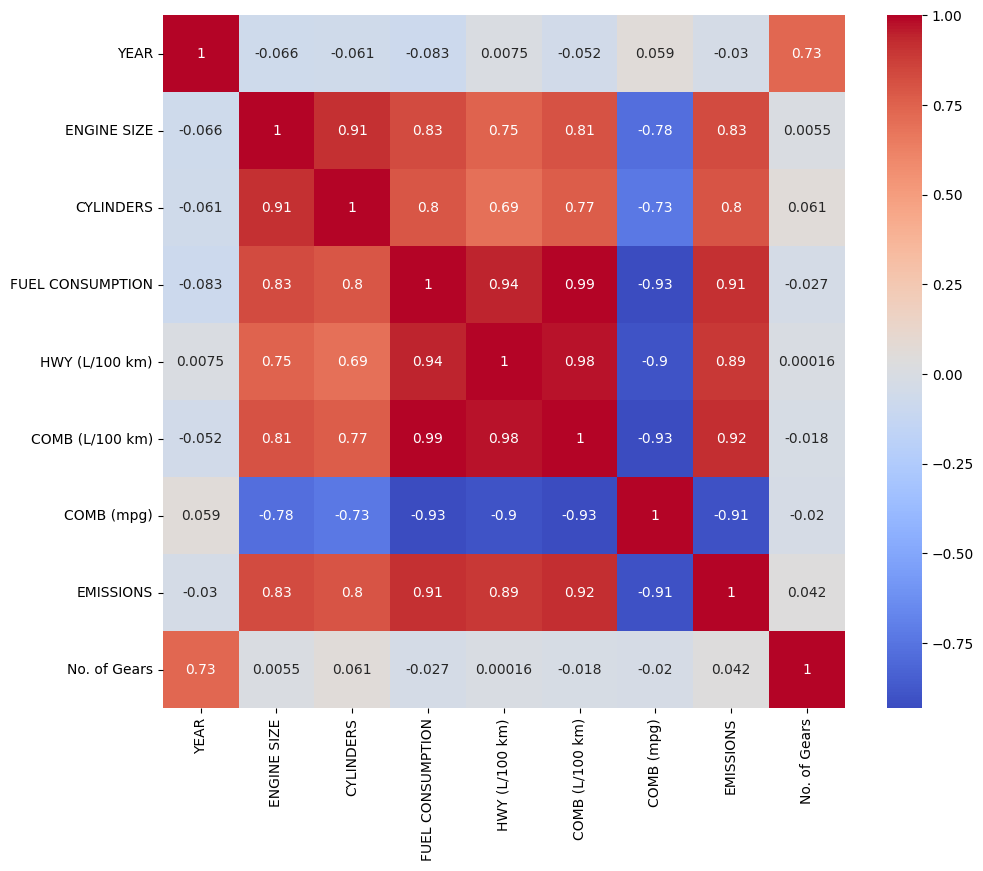

In [190]:
plt.figure(figsize=(11,9))
sns.heatmap(numeric_data.corr(),annot=True, cmap= 'coolwarm');

In [191]:
numeric_data.head()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,No. of Gears
0,2000,1.6,4,9.2,6.7,8.1,35,186,4.0
1,2000,1.6,4,8.5,6.5,7.6,37,175,5.0
2,2000,3.2,6,12.2,7.4,10.0,28,230,5.0
3,2000,3.5,6,13.4,9.2,11.5,25,264,4.0
4,2000,1.8,4,10.0,7.0,8.6,33,198,4.0


In [192]:
num_data_ml= numeric_data.drop(['YEAR','No. of Gears'], axis=1) #No correlation hence irrelevant
num_data_ml= num_data_ml.drop(['HWY (L/100 km)','FUEL CONSUMPTION', 'COMB (mpg)',], axis=1) #reduntant fuel consumption variables
num_data_ml.columns

Index(['ENGINE SIZE', 'CYLINDERS', 'COMB (L/100 km)', 'EMISSIONS'], dtype='object')

In [193]:
# encoded_df_ml= encoded_df.select_dtypes(include=['number'])
# encoded_df_ml.columns

In [194]:
# prompt: apply linear regression model to find the fuel consumption of a new vehicle

X2 = fuel_con[['ENGINE SIZE', 'CYLINDERS']]
y2 = fuel_con['COMB (L/100 km)']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42) #splitting the data
model = LinearRegression()
model.fit(X2_train, y2_train) #fitting the model
y2_pred = model.predict(X2_test) #predicting the values
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y2_test, y2_pred)
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
# Predict fuel consumption for a new vehicle
new_vehicle_features = [[2.0, 4]]  # Example: 2.0L engine, 4 cylinders
predicted_consumption = model.predict(new_vehicle_features)
print("Predicted Fuel Consumption (L/100 km):", predicted_consumption[0])


Mean Squared Error: 2.715747401562928
R-squared: 0.6620619648521684
Mean Absolute Error: 1.225886426818427
Predicted Fuel Consumption (L/100 km): 8.68244611232986


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting the data

In [196]:
model = LinearRegression()
model.fit(X_train, y_train) #fitting the model
y_pred = model.predict(X_test) #predicting the values
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.7820378371761225
R-squared: 0.6659560919620037
Mean Absolute Error: 1.221231961071507


In [197]:
# Scaling all the variables to a range of 0 to 1

from sklearn.preprocessing import MinMaxScaler

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [198]:
model = LinearRegression()
model.fit(X_train, y_train) #fitting the model
y_pred = model.predict(X_test) #predicting the values
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % model.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, y_pred))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((y_pred - y_test) ** 2))
print('R2 of Multiple Linear regression:',r2_score(y_test, y_pred))
print('R2 rounded of Multiple Linear regression:',(r2_score(y_test, y_pred)).round(2))
r2 = r2_score(y_test, y_pred)
r2_rounded = r2_score(y_test, y_pred).round(2)
n = len(X_test)
k = X_test.shape[1]
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = model.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Squared Error: 2.7820378371761225
R-squared: 0.6659560919620037
Mean Absolute Error: 1.221231961071507
Variance score of Multiple Linear regression: 0.67
Explained Variance Score (EVS) of Multiple Linear regression: 0.6659696976113196
Residual sum of squares of Multiple Linear regression: 2.78
R2 of Multiple Linear regression: 0.6659560919620037
R2 rounded of Multiple Linear regression: 0.67
Adjusted_r2 of Multiple Linear regression:  0.662
Accuracy of Multiple Linear regression: 0.6659560919620037


In [199]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) #fitting the model
y_pred = model.predict(X_test) #predicting the values
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
# Explained variance score: 1 is perfect prediction
print('Variance score of DecisionTreeRegressor: %.2f' % model.score(X_train, y_train))
print('Explained Variance Score (EVS) of DecisionTreeRegressor:',explained_variance_score(y_test, y_pred))
#Residual sum of squares (rss)
print("Residual sum of squares of DecisionTreeRegressor: %.2f" % np.mean((y_pred - y_test) ** 2))
print('R2 of DecisionTreeRegressor:',r2_score(y_test, y_pred))
print('R2 rounded of DecisionTreeRegressor:',(r2_score(y_test, y_pred)).round(2))
r2 = r2_score(y_test, y_pred)
r2_rounded = r2_score(y_test, y_pred).round(2)
n = len(X_test)
k = X_test.shape[1]
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of DecisionTreeRegressor: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = model.score(X_test, y_test)
print("Accuracy of DecisionTreeRegressor: {}".format(accuracy))

Mean Squared Error: 2.922498077983398
Root Mean Squared Error: 1.709531537580807
R-squared: 0.6490907973437083
Mean Absolute Error: 1.1940498205596295
Variance score of DecisionTreeRegressor: 0.84
Explained Variance Score (EVS) of DecisionTreeRegressor: 0.6492342292640008
Residual sum of squares of DecisionTreeRegressor: 2.92
R2 of DecisionTreeRegressor: 0.6490907973437083
R2 rounded of DecisionTreeRegressor: 0.65
Adjusted_r2 of DecisionTreeRegressor:  0.645
Accuracy of DecisionTreeRegressor: 0.6490907973437083


In [200]:
model = RandomForestRegressor()
model.fit(X_train, y_train) #fitting the model
y_pred = model.predict(X_test) #predicting the values
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
# Explained variance score: 1 is perfect prediction
print('Variance score of RandomForestRegressor: %.2f' % model.score(X_train, y_train))
print('Explained Variance Score (EVS) of RandomForestRegressor:',explained_variance_score(y_test, y_pred))
#Residual sum of squares (rss)
print("Residual sum of squares of RandomForestRegressor: %.2f" % np.mean((y_pred - y_test) ** 2))
print('R2 of RandomForestRegressor:',r2_score(y_test, y_pred))
print('R2 rounded of RandomForestRegressor:',(r2_score(y_test, y_pred)).round(2))
r2 = r2_score(y_test, y_pred)
r2_rounded = r2_score(y_test, y_pred).round(2)
n = len(X_test)
k = X_test.shape[1]
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of RandomForestRegressor: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = model.score(X_test, y_test)
print("Accuracy of RandomForestRegressor: {}".format(accuracy))

Mean Squared Error: 2.555254086454261
Root Mean Squared Error: 1.598516214010437
R-squared: 0.6931863939220735
Mean Absolute Error: 1.1321130666265982
Variance score of RandomForestRegressor: 0.83
Explained Variance Score (EVS) of RandomForestRegressor: 0.6933663307420121
Residual sum of squares of RandomForestRegressor: 2.56
R2 of RandomForestRegressor: 0.6931863939220735
R2 rounded of RandomForestRegressor: 0.69
Adjusted_r2 of RandomForestRegressor:  0.689
Accuracy of RandomForestRegressor: 0.6931863939220735


In [201]:
model = SVR()
model.fit(X_train, y_train) #fitting the model
y_pred = model.predict(X_test) #predicting the values
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
# Explained variance score: 1 is perfect prediction
print('Variance score of SVR: %.2f' % model.score(X_train, y_train))
print('Explained Variance Score (EVS) of SVR:',explained_variance_score(y_test, y_pred))
#Residual sum of squares (rss)
print("Residual sum of squares of SVR: %.2f" % np.mean((y_pred - y_test) ** 2))
print('R2 of SVR:',r2_score(y_test, y_pred))
print('R2 rounded of SVR:',(r2_score(y_test, y_pred)).round(2))
r2 = r2_score(y_test, y_pred)
r2_rounded = r2_score(y_test, y_pred).round(2)
n = len(X_test)
k = X_test.shape[1]
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of SVR: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = model.score(X_test, y_test)
print("Accuracy of SVR: {}".format(accuracy))

Mean Squared Error: 2.8131696156575208
Root Mean Squared Error: 1.6772506120605593
R-squared: 0.6622180475655064
Mean Absolute Error: 1.1857616772814317
Variance score of SVR: 0.67
Explained Variance Score (EVS) of SVR: 0.66749783621349
Residual sum of squares of SVR: 2.81
R2 of SVR: 0.6622180475655064
R2 rounded of SVR: 0.66
Adjusted_r2 of SVR:  0.658
Accuracy of SVR: 0.6622180475655064


In [202]:
model = XGBRegressor()
model.fit(X_train, y_train) #fitting the model
y_pred = model.predict(X_test) #predicting the values
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
# Explained variance score: 1 is perfect prediction
print('Variance score of XGBRegressor: %.2f' % model.score(X_train, y_train))
print('Explained Variance Score (EVS) of XGBRegressor:',explained_variance_score(y_test, y_pred))
#Residual sum of squares (rss)
print("Residual sum of squares of XGBRegressor: %.2f" % np.mean((y_pred - y_test) ** 2))
print('R2 of XGBRegressor:',r2_score(y_test, y_pred))
print('R2 rounded of XGBRegressor:',(r2_score(y_test, y_pred)).round(2))
r2 = r2_score(y_test, y_pred)
r2_rounded = r2_score(y_test, y_pred).round(2)
n = len(X_test)
k = X_test.shape[1]
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of XGBRegressor: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = model.score(X_test, y_test)
print("Accuracy of XGBRegressor: {}".format(accuracy))


Mean Squared Error: 2.341924118315768
Root Mean Squared Error: 1.5303346425915372
R-squared: 0.7188012778414585
Mean Absolute Error: 1.0973630515994022
Variance score of XGBRegressor: 0.78
Explained Variance Score (EVS) of XGBRegressor: 0.7189184634080867
Residual sum of squares of XGBRegressor: 2.34
R2 of XGBRegressor: 0.7188012778414585
R2 rounded of XGBRegressor: 0.72
Adjusted_r2 of XGBRegressor:  0.715
Accuracy of XGBRegressor: 0.7188012778414585


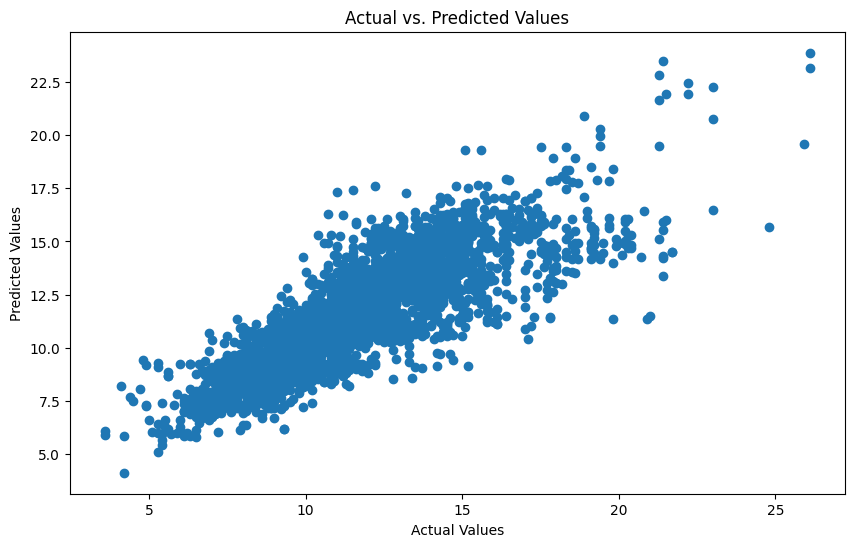

In [203]:
#Plot actual vs predicted values on a scatterplot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

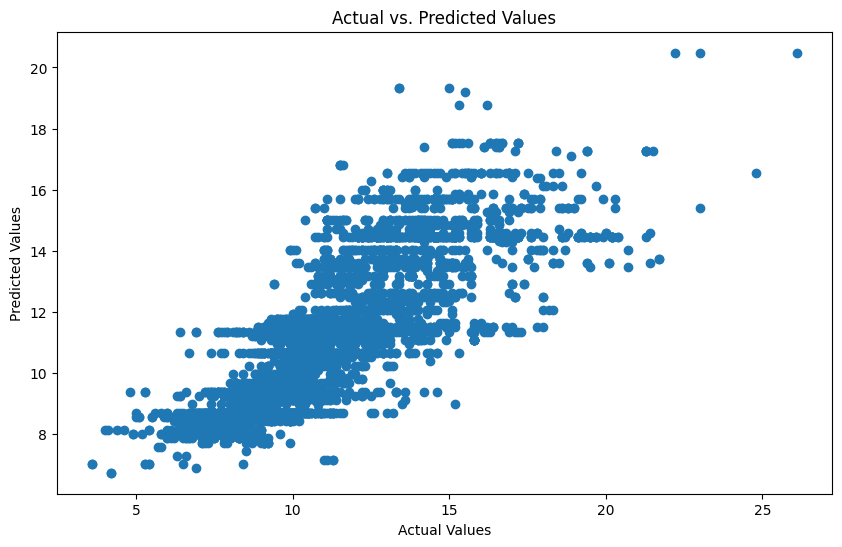

In [204]:
#Plot actual vs predicted values on a scatterplot
plt.figure(figsize=(10,6))
plt.scatter(y2_test, y2_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

#Step 7: Model Deployment using Streamlit

In [205]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [206]:
import streamlit as st
import joblib

In [207]:
joblib.dump(model, 'fuel_consumption_model.pkl')

['fuel_consumption_model.pkl']